In [ ]:
!pip install google-play-scraper
!git clone https://github.com/Leonz5288/DSforB_FinalProj.git
%cd DSforB_FinalProj

Cloning into 'DSforB_FinalProj'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 21 (delta 5), reused 19 (delta 3), pack-reused 0
Receiving objects: 100% (21/21), 20.99 MiB | 30.05 MiB/s, done.
Resolving deltas: 100% (5/5), done.
/content/DSforB_FinalProj/DSforB_FinalProj


In [ ]:
%ls

 ad_info.csv              'Initial Proposal AD.pdf'   README.md
 app_fb_gg_platform.xlsx   ios_names.xlsx             README.txt


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Trick to display plots inline with the rest of your notebook.
%matplotlib inline
pd.set_option('display.max_columns', None)

# Code for merging

In [ ]:

ad_info_path = "./ad_info.csv"
app_fb_gg_platform_path = "./app_fb_gg_platform.xlsx"

try:
    ad_info_df = pd.read_csv(ad_info_path)
    app_fb_gg_platform_df = pd.read_excel(app_fb_gg_platform_path, engine='openpyxl')

    print("success")
except Exception as e:
    print(f"error：{e}")



success


In [ ]:
google_df = app_fb_gg_platform_df[app_fb_gg_platform_df['channel'] == 'Google']
google_df['calendar_date'] = pd.to_datetime(google_df['calendar_date'])
ad_info_df['ad_first_dt'] = pd.to_datetime(ad_info_df['ad_first_dt'], format='%Y/%m/%d')
ad_info_df['ad_last_dt'] = pd.to_datetime(ad_info_df['ad_last_dt'], format='%Y/%m/%d')

ad_info_df['date_range'] = ad_info_df.apply(lambda row: pd.date_range(start=row['ad_first_dt'], end=row['ad_last_dt']), axis=1)
ad_info_df_exploded = ad_info_df.explode('date_range')

google_df = pd.merge(google_df, ad_info_df_exploded[['ad_id', 'date_range', 'campaign_objective', 'targeting_age', 'targeting_genders', 'os_type']],
                     left_on=['ad_id', 'calendar_date'],
                     right_on=['ad_id', 'date_range'],
                     how='left').drop('date_range', axis=1)

<ipython-input-12-f3f9d74688f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_df['calendar_date'] = pd.to_datetime(google_df['calendar_date'])


In [ ]:
google_df.shape

(63570, 24)

In [ ]:
google_df.head()

,ad_id,campaign_id,adgroup_id,calendar_date,ucompany_id,product_id,product_name,product_category,campaign_objective_x,channel,gender,os_type_x,ad_network_type,device,spend,impressions,clicks,installs,purchase,purchase_value,campaign_objective_y,targeting_age,targeting_genders,os_type_y
0,15738995501,15738995501,15738995501,2022-01-02,66703.0,tile.connect.onet.onnect.pairs.matching.game.f...,Tile Connect - Tile Match Game,NaN,NaN,Google,NaN,ANDROID,SEARCH,TABLET,0.0000,2.0,0.0,0.0,0.0,0.0,APP_INSTALLS,18-65,NaN,ANDROID
1,15738995501,15738995501,15738995501,2022-01-03,66703.0,tile.connect.onet.onnect.pairs.matching.game.f...,Tile Connect - Tile Match Game,NaN,NaN,Google,NaN,ANDROID,SEARCH_PARTNERS,MOBILE,0.0000,2.0,0.0,0.0,0.0,0.0,APP_INSTALLS,18-65,NaN,ANDROID
2,15712434228,15712434228,15712434228,2022-01-05,32227.0,com.sevenpirates.idlejp,NaN,NaN,NaN,Google,NaN,ANDROID,YOUTUBE_WATCH,MOBILE,30.2455,1874.0,37.0,0.0,0.0,0.0,APP_INSTALLS,24-65,male,ANDROID
3,15712434228,15712434228,15712434228,2022-01-05,32227.0,com.sevenpirates.idlejp,いけー！放置戦士,NaN,NaN,Google,NaN,ANDROID,YOUTUBE_WATCH,MOBILE,30.2455,1874.0,37.0,0.0,0.0,0.0,APP_INSTALLS,24-65,male,ANDROID
4,15712434228,15712434228,15712434228,2022-01-06,32227.0,com.sevenpirates.idlejp,NaN,NaN,NaN,Google,NaN,ANDROID,YOUTUBE_WATCH,MOBILE,32.5929,3474.0,84.0,0.0,0.0,0.0,APP_INSTALLS,24-65,male,ANDROID


In [ ]:
facebook_df = app_fb_gg_platform_df[app_fb_gg_platform_df['channel'] == 'Facebook']
facebook_df['calendar_date'] = pd.to_datetime(facebook_df['calendar_date'])
ad_info_df['ad_first_dt'] = pd.to_datetime(ad_info_df['ad_first_dt'], format='%Y/%m/%d')
ad_info_df['ad_last_dt'] = pd.to_datetime(ad_info_df['ad_last_dt'], format='%Y/%m/%d')

ad_info_df['date_range'] = ad_info_df.apply(lambda row: pd.date_range(start=row['ad_first_dt'], end=row['ad_last_dt']), axis=1)
ad_info_df_exploded = ad_info_df.explode('date_range')

facebook_df = pd.merge(facebook_df, ad_info_df_exploded[['product_id', 'date_range', 'campaign_objective', 'targeting_age', 'targeting_genders', 'os_type']],
                     left_on=['product_id', 'calendar_date'],
                     right_on=['product_id', 'date_range'],
                     how='left').drop('date_range', axis=1)


<ipython-input-15-147af45052f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  facebook_df['calendar_date'] = pd.to_datetime(facebook_df['calendar_date'])


In [ ]:
facebook_df.head()

,ad_id,campaign_id,adgroup_id,calendar_date,ucompany_id,product_id,product_name,product_category,campaign_objective_x,channel,gender,os_type_x,ad_network_type,device,spend,impressions,clicks,installs,purchase,purchase_value,campaign_objective_y,targeting_age,targeting_genders,os_type_y
0,23848810842570570,23848809733400570,23848809733440570,2022-01-11,25228.0,com.wifispeed.check,WiFi Speed_GP,NaN,APP_INSTALLS,Facebook,NaN,ANDROID,facebook,mobile_app,0.55,60.0,0.0,0.0,0.0,0.0,APP_INSTALLS,18-65,NaN,ANDROID
1,23848810842570570,23848809733400570,23848809733440570,2022-01-11,25228.0,com.wifispeed.check,WiFi Speed_GP,NaN,APP_INSTALLS,Facebook,NaN,ANDROID,facebook,mobile_app,0.55,60.0,0.0,0.0,0.0,0.0,APP_INSTALLS,18-65,NaN,ANDROID
2,23848810842570570,23848809733400570,23848809733440570,2022-01-11,25228.0,com.wifispeed.check,WiFi Speed_GP,NaN,APP_INSTALLS,Facebook,NaN,ANDROID,facebook,mobile_app,0.55,60.0,0.0,0.0,0.0,0.0,APP_INSTALLS,18-65,NaN,ANDROID
3,23848810842570570,23848809733400570,23848809733440570,2022-01-11,25228.0,com.wifispeed.check,WiFi Speed_GP,NaN,APP_INSTALLS,Facebook,NaN,ANDROID,facebook,mobile_app,0.55,60.0,0.0,0.0,0.0,0.0,APP_INSTALLS,18-65,NaN,ANDROID
4,23848810842570570,23848809733400570,23848809733440570,2022-01-11,25228.0,com.wifispeed.check,WiFi Speed_GP,NaN,APP_INSTALLS,Facebook,NaN,ANDROID,facebook,mobile_app,0.55,60.0,0.0,0.0,0.0,0.0,APP_INSTALLS,18-65,NaN,ANDROID


In [ ]:
facebook_df.shape

(11907029, 24)

In [ ]:
facebook_df.drop_duplicates(inplace=True)

In [ ]:
facebook_df.shape

(286610, 24)

In [ ]:
combined_df = pd.concat([google_df, facebook_df], axis=0)
combined_df.shape

(350180, 24)

In [ ]:
combined_df.drop(columns=['gender','product_category'],inplace=True)
combined_df.drop(columns=['campaign_objective_y','os_type_y'],inplace=True)
combined_df.rename(columns={'campaign_objective_x': 'campaign_objective', 'os_type_x': 'os_type'},inplace=True)
combined_df = combined_df[combined_df.spend!=0]
combined_df.shape

(198680, 20)

In [ ]:
combined_df.to_csv('combined_data.csv',index=False)

In [ ]:
combined_df = pd.read_csv('combined_data.csv')

<ipython-input-23-7e5e62e9b89f>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_df = pd.read_csv('combined_data.csv')


In [ ]:
pd.set_option('display.max_columns', None)
combined_df.head()

,ad_id,campaign_id,adgroup_id,calendar_date,ucompany_id,product_id,product_name,campaign_objective,channel,os_type,ad_network_type,device,spend,impressions,clicks,installs,purchase,purchase_value,targeting_age,targeting_genders
0,15712434228,15712434228,15712434228,2022-01-05,32227.0,com.sevenpirates.idlejp,NaN,NaN,Google,ANDROID,YOUTUBE_WATCH,MOBILE,30.2455,1874.0,37.0,0.0,0.0,0.0,24-65,male
1,15712434228,15712434228,15712434228,2022-01-05,32227.0,com.sevenpirates.idlejp,いけー！放置戦士,NaN,Google,ANDROID,YOUTUBE_WATCH,MOBILE,30.2455,1874.0,37.0,0.0,0.0,0.0,24-65,male
2,15712434228,15712434228,15712434228,2022-01-06,32227.0,com.sevenpirates.idlejp,NaN,NaN,Google,ANDROID,YOUTUBE_WATCH,MOBILE,32.5929,3474.0,84.0,0.0,0.0,0.0,24-65,male
3,15712434228,15712434228,15712434228,2022-01-06,32227.0,com.sevenpirates.idlejp,いけー！放置戦士,NaN,Google,ANDROID,YOUTUBE_WATCH,MOBILE,32.5929,3474.0,84.0,0.0,0.0,0.0,24-65,male
4,15794431327,15794431327,15794431327,2022-01-07,65695.0,com.yeetown.bricks.breaker.ballz.shoot,Bricks Breaker: Hit Ball Blast,NaN,Google,ANDROID,YOUTUBE_WATCH,TABLET,0.0479,38.0,2.0,0.0,0.0,0.0,18-65,NaN


After this we label Null values in a few columns as Unknown and then do
.dropna()

In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198680 entries, 0 to 198679
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ad_id               198680 non-null  int64  
 1   campaign_id         198680 non-null  int64  
 2   adgroup_id          198680 non-null  int64  
 3   calendar_date       198680 non-null  object 
 4   ucompany_id         195246 non-null  float64
 5   product_id          198680 non-null  object 
 6   product_name        183215 non-null  object 
 7   campaign_objective  146168 non-null  object 
 8   channel             198680 non-null  object 
 9   os_type             198660 non-null  object 
 10  ad_network_type     198680 non-null  object 
 11  device              198680 non-null  object 
 12  spend               198680 non-null  float64
 13  impressions         198680 non-null  float64
 14  clicks              198680 non-null  float64
 15  installs            198680 non-nul

In [ ]:
combined_df.targeting_genders.fillna('all',inplace=True)
combined_df.campaign_objective.fillna('UNKNOWN',inplace=True)

In [ ]:
combined_df['channel'] = combined_df['channel'].astype('category')
combined_df['os_type'] = combined_df['os_type'].astype('category')
combined_df['ad_network_type'] = combined_df['ad_network_type'].astype('category')
combined_df['device'] = combined_df['device'].astype('category')
combined_df['targeting_genders'] = combined_df['targeting_genders'].astype('category')
combined_df['campaign_objective'] = combined_df['campaign_objective'].astype('category')

In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198680 entries, 0 to 198679
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   ad_id               198680 non-null  int64   
 1   campaign_id         198680 non-null  int64   
 2   adgroup_id          198680 non-null  int64   
 3   calendar_date       198680 non-null  object  
 4   ucompany_id         195246 non-null  float64 
 5   product_id          198680 non-null  object  
 6   product_name        183215 non-null  object  
 7   campaign_objective  198680 non-null  category
 8   channel             198680 non-null  category
 9   os_type             198660 non-null  category
 10  ad_network_type     198680 non-null  category
 11  device              198680 non-null  category
 12  spend               198680 non-null  float64 
 13  impressions         198680 non-null  float64 
 14  clicks              198680 non-null  float64 
 15  installs         

In [ ]:
combined_df.shape

(198680, 20)

In [ ]:
combined_df.dropna(inplace=True)
combined_df.shape

(90527, 20)

In [ ]:
df = combined_df
print(df.os_type.value_counts())
df_clean = df.dropna()
df_clean = df_clean[df_clean['spend'] != 0]
print(df_clean.os_type.value_counts())
print(df_clean.shape)

os_type
ANDROID    84027
IOS         6500
Name: count, dtype: int64
os_type
ANDROID    84027
IOS         6500
Name: count, dtype: int64
(90527, 20)


# EDA Graphs

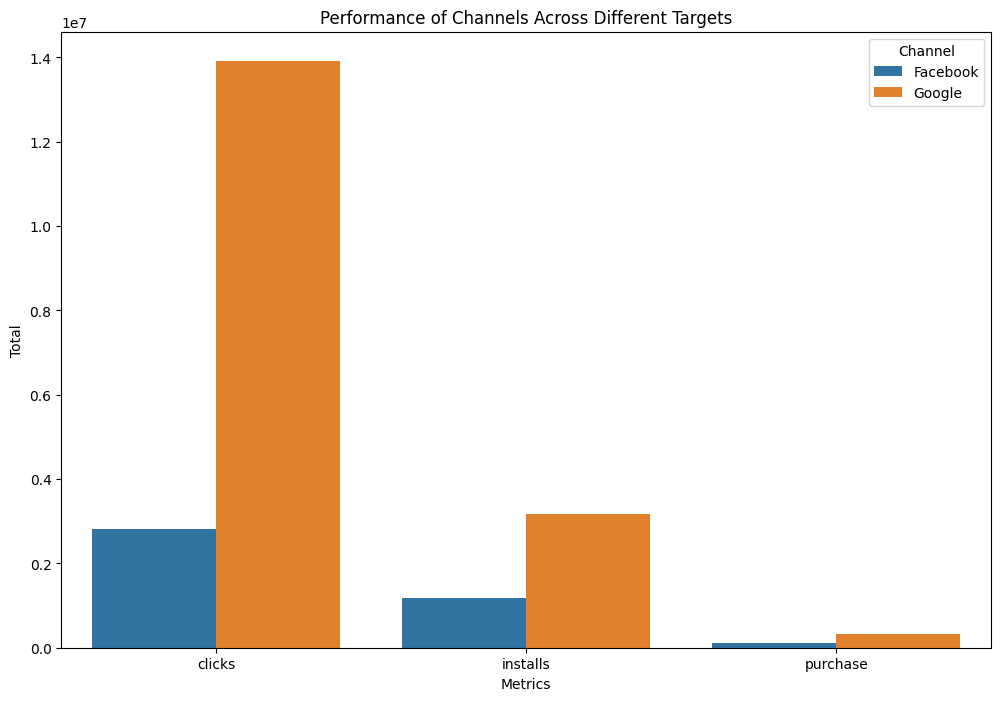

In [ ]:
import seaborn as sns


# Step 1: Aggregate the data by channel only
aggregated_data = combined_df.groupby('channel').agg({
    'clicks': 'sum',
    'installs': 'sum',
    'purchase': 'sum'
}).reset_index()

# Step 2: Melt the DataFrame to make it suitable for seaborn's barplot
melted_data = aggregated_data.melt(id_vars='channel', value_vars=['clicks', 'installs', 'purchase'],
                                   var_name='Metric', value_name='Value')

# Step 3: Create the plots
plt.figure(figsize=(12, 8))
sns.barplot(x='Metric', y='Value', hue='channel', data=melted_data)
plt.title('Performance of Channels Across Different Targets')
plt.xlabel('Metrics')
plt.ylabel('Total')
plt.legend(title='Channel')
plt.show()


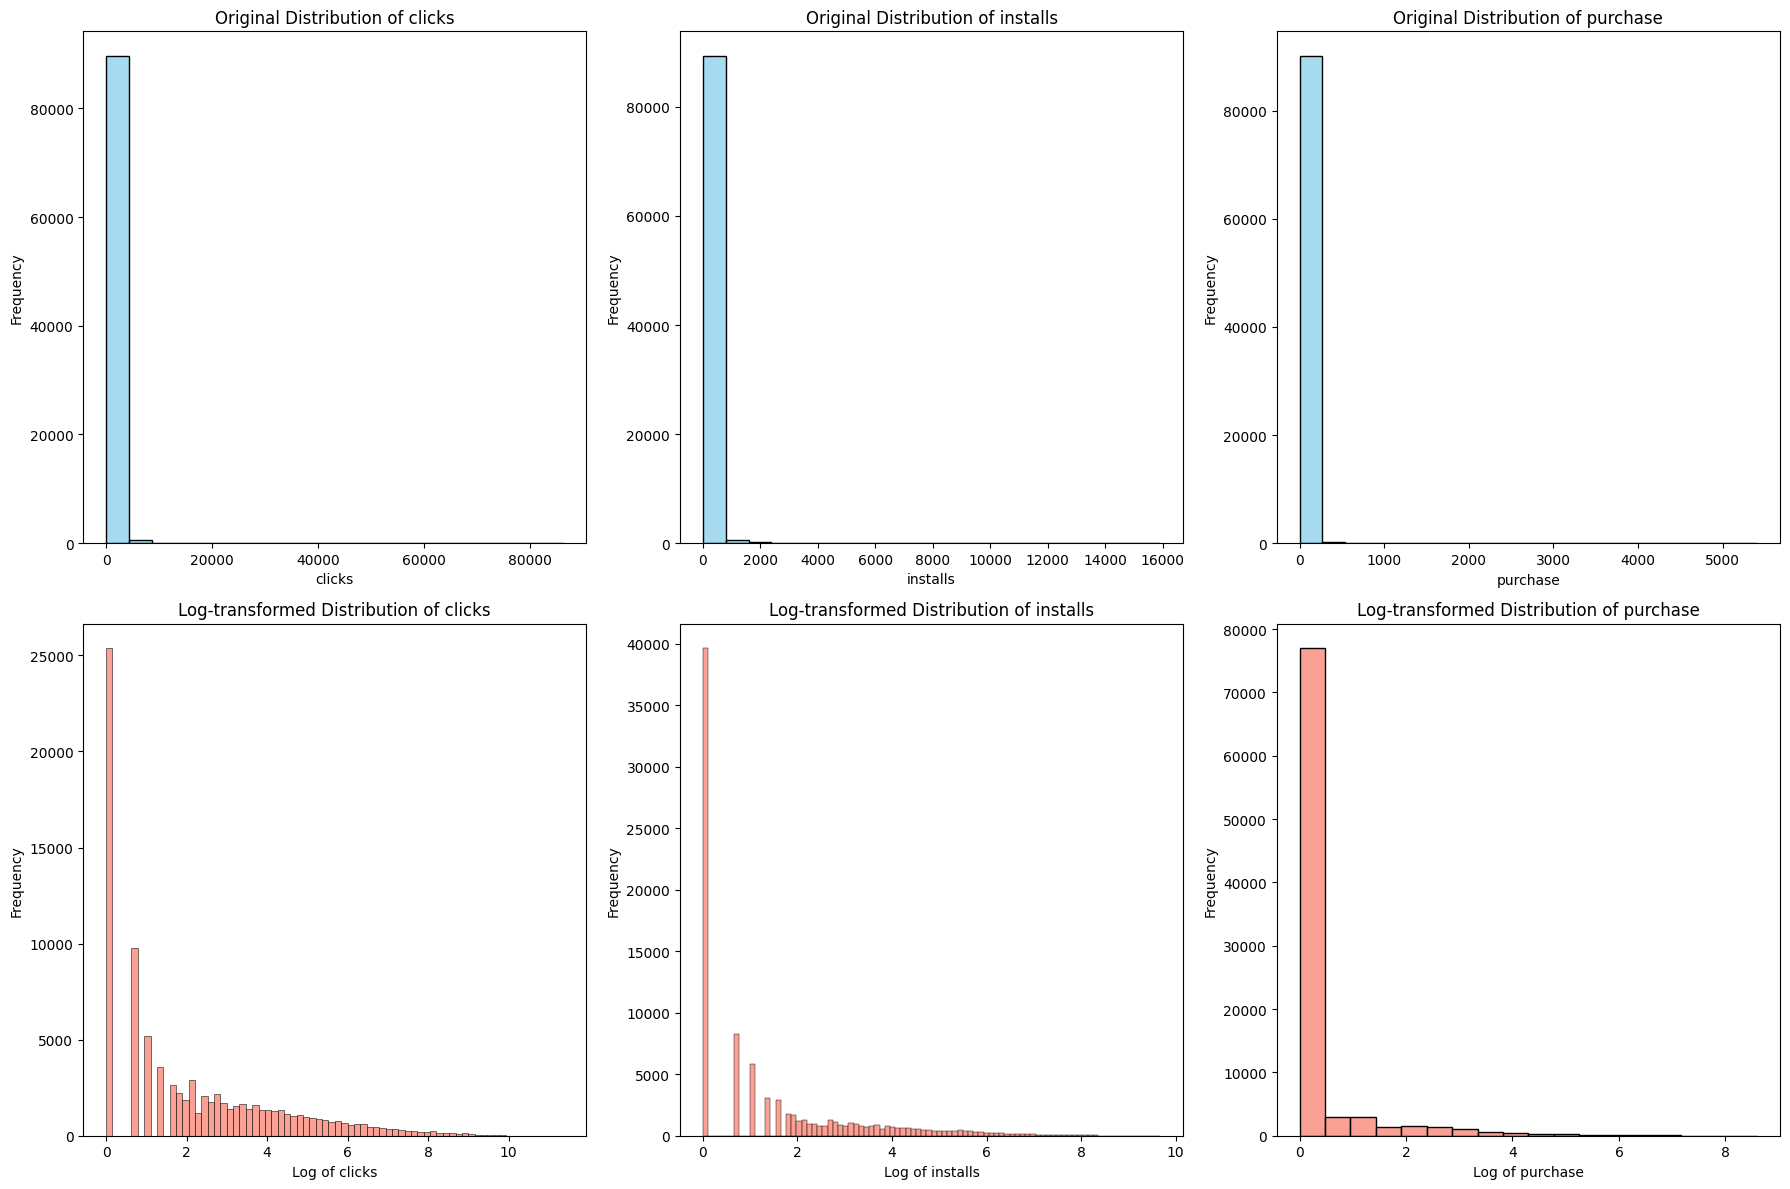

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'df' is your DataFrame containing the data
variables = ['clicks', 'installs', 'purchase']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # 2 rows, 3 columns

for i, var in enumerate(variables):
    # Original Data
    sns.histplot(combined_df[var], kde=False, ax=axes[0, i], color='skyblue')
    axes[0, i].set_title(f'Original Distribution of {var}')
    axes[0, i].set_xlabel(var)
    axes[0, i].set_ylabel('Frequency')

    # Log-transformed Data (adding 1 to handle zero values)
    log_data = np.log(combined_df[var] + 1)
    sns.histplot(log_data, kde=False, ax=axes[1, i], color='salmon')
    axes[1, i].set_title(f'Log-transformed Distribution of {var}')
    axes[1, i].set_xlabel(f'Log of {var}')
    axes[1, i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


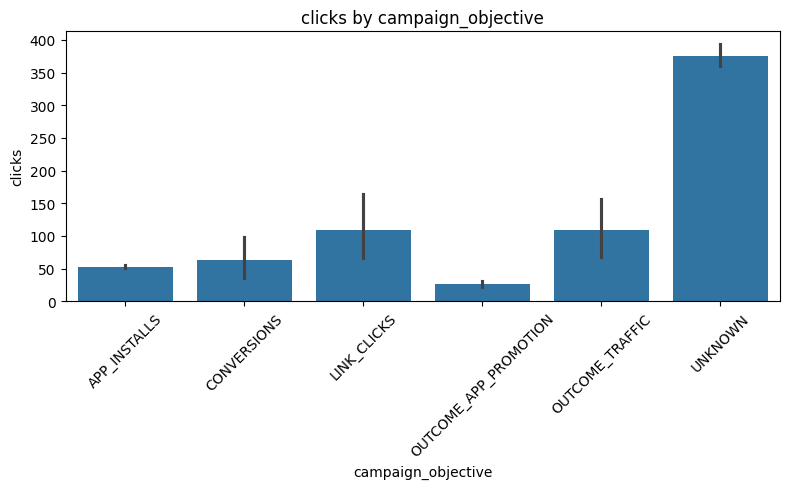

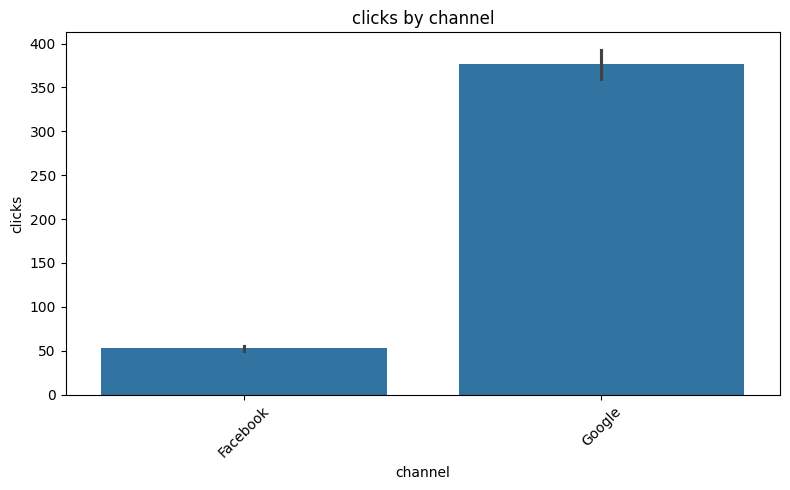

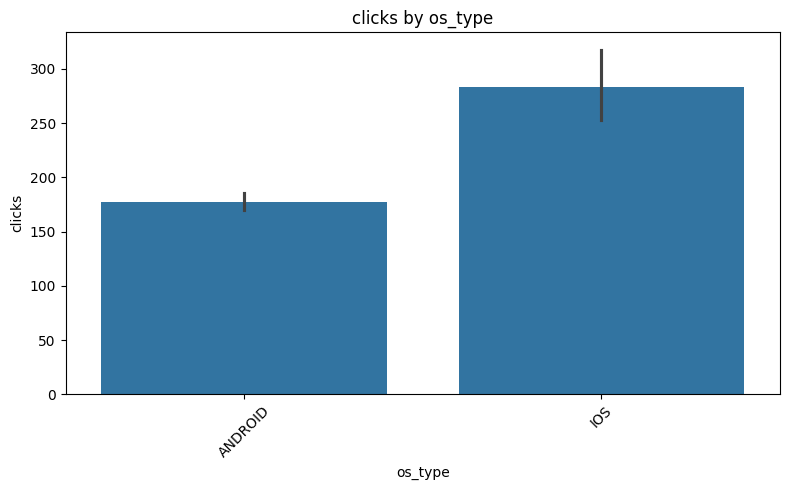

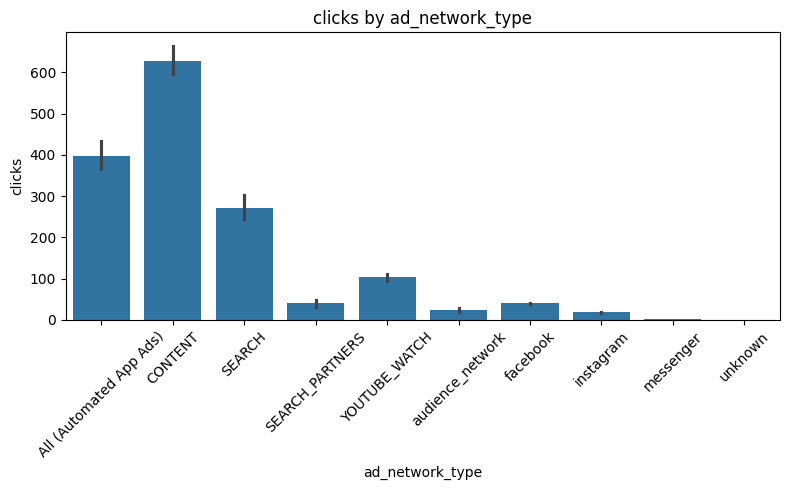

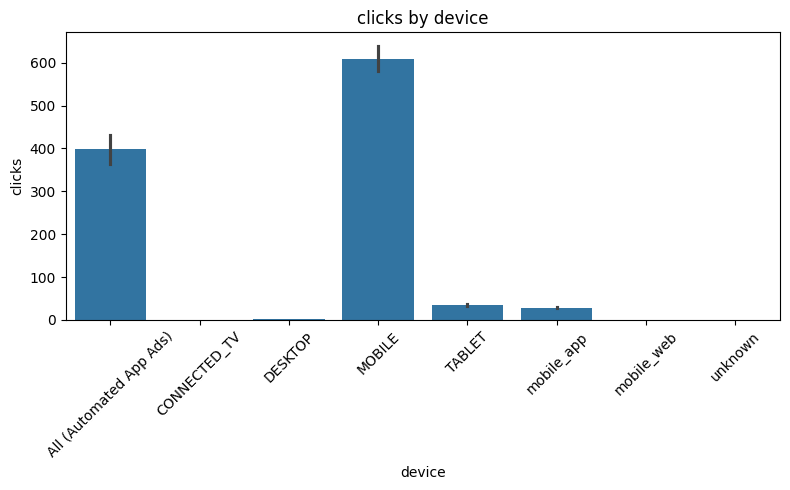

In [ ]:
import seaborn as sns
features = ['campaign_objective', 'channel', 'os_type', 'ad_network_type', 'device']
target_variable = 'clicks'

# Function to generate bar graphs
def generate_bar_graphs(df, features, target_variable):
    for feature in features:
        plt.figure(figsize=(8, 5))
        sns.barplot(x=feature, y=target_variable, data=df)
        plt.title(f"{target_variable} by {feature}")
        plt.xlabel(feature)
        plt.ylabel(target_variable)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Call the function
generate_bar_graphs(df, features, target_variable)

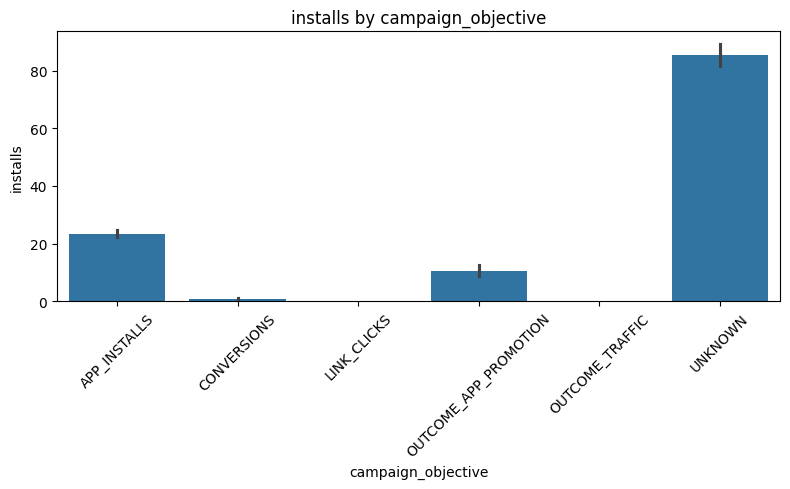

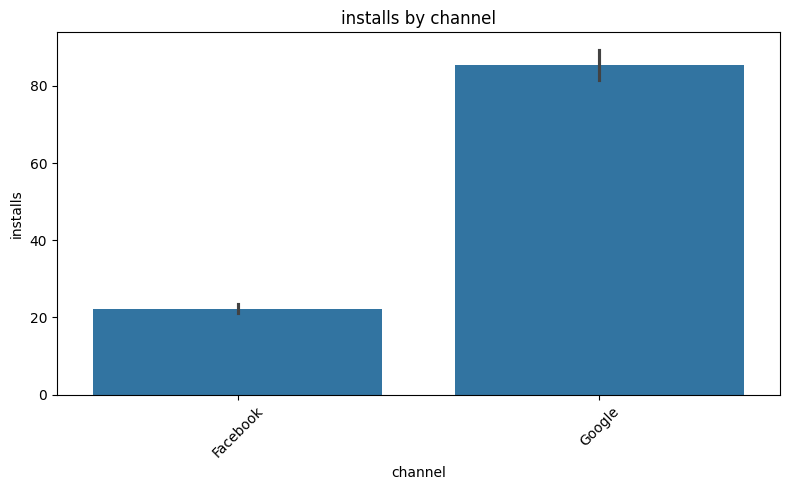

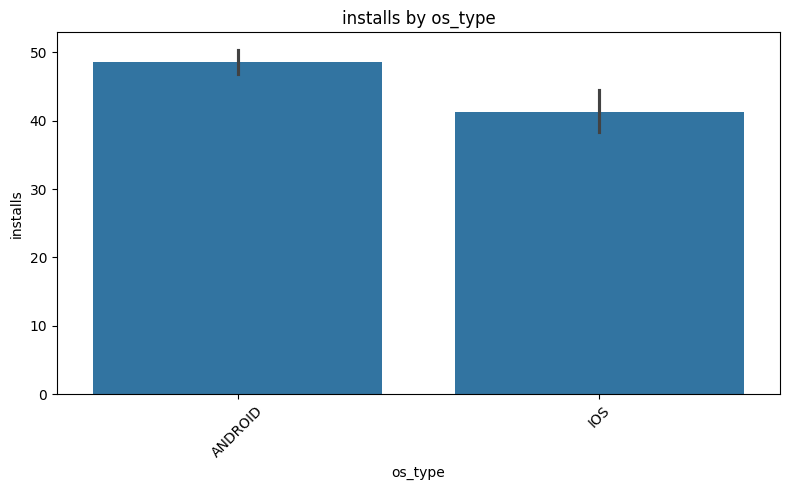

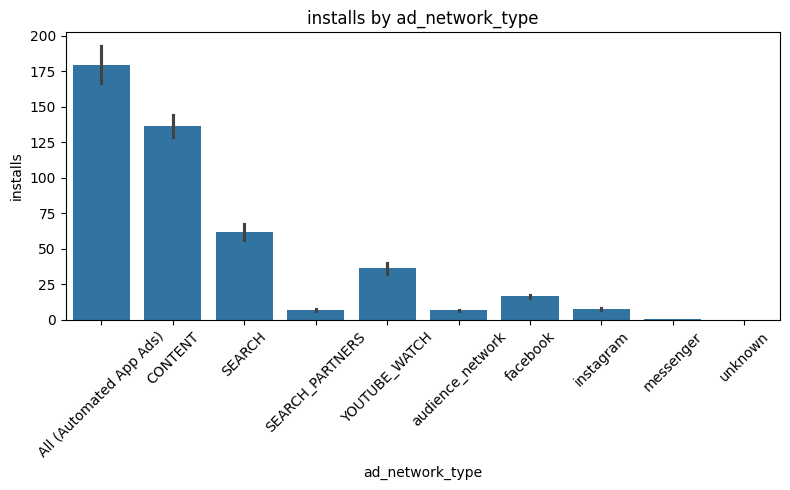

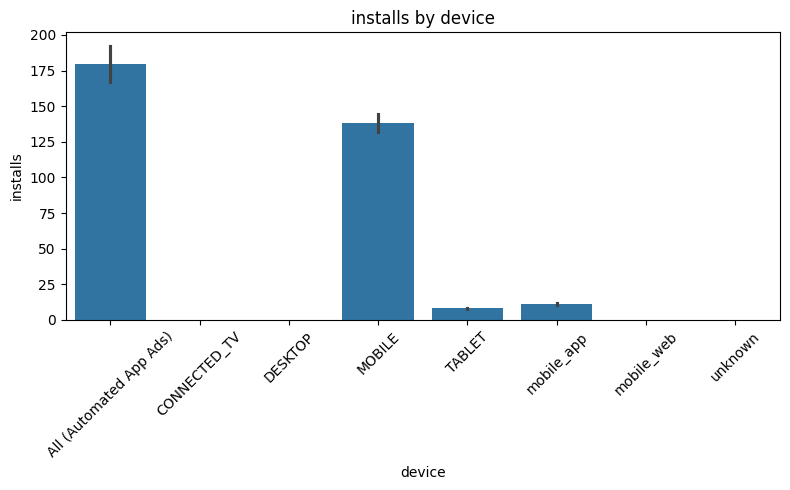

In [ ]:
import seaborn as sns
features = ['campaign_objective', 'channel', 'os_type', 'ad_network_type', 'device']
target_variable = 'installs'

# Function to generate bar graphs
def generate_bar_graphs(df, features, target_variable):
    for feature in features:
        plt.figure(figsize=(8, 5))
        sns.barplot(x=feature, y=target_variable, data=df)
        plt.title(f"{target_variable} by {feature}")
        plt.xlabel(feature)
        plt.ylabel(target_variable)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Call the function
generate_bar_graphs(df, features, target_variable)

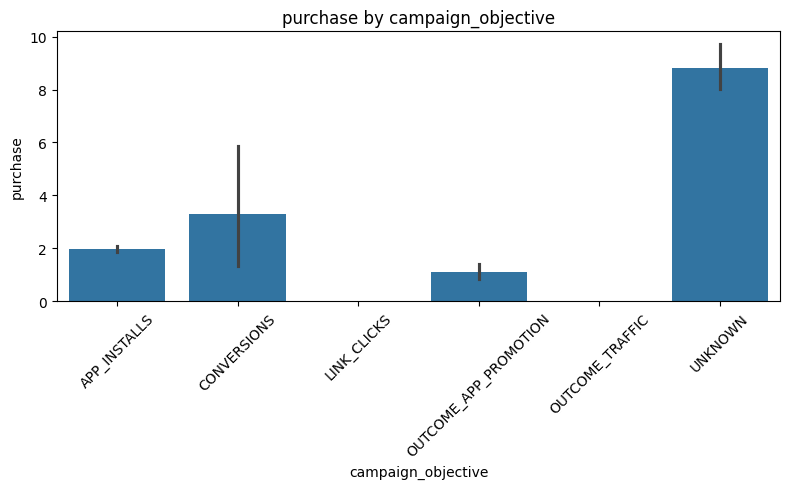

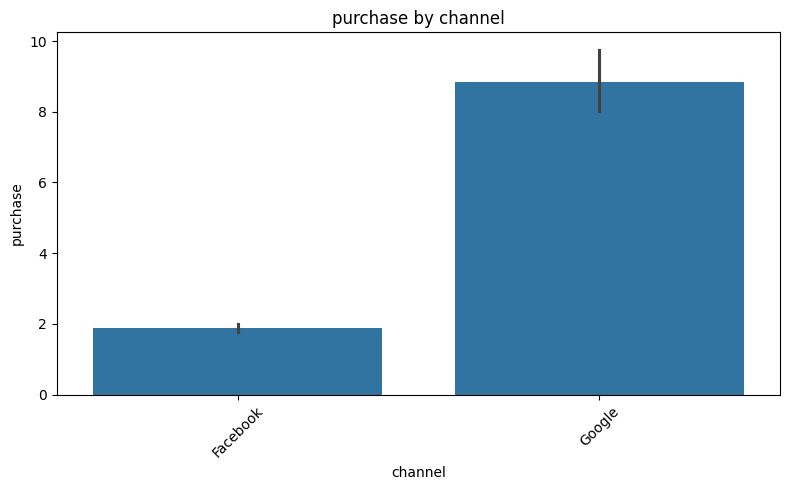

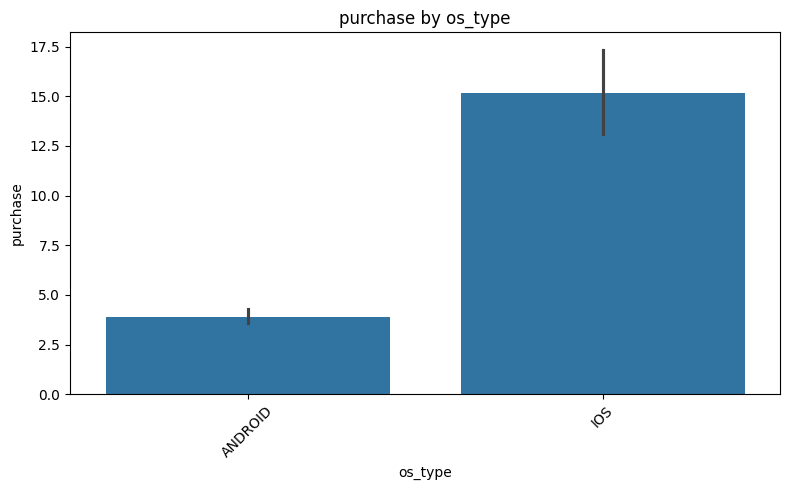

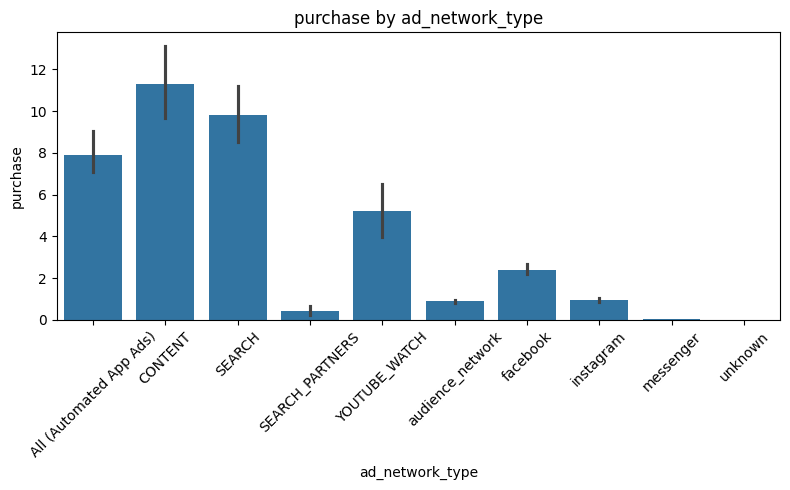

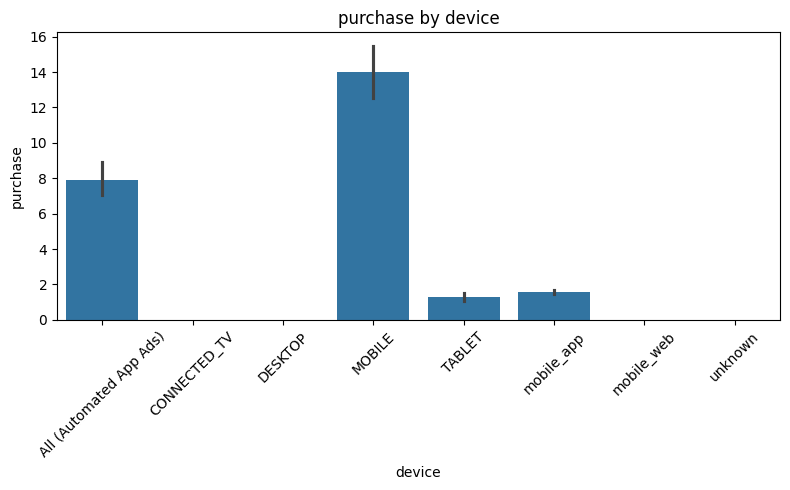

In [ ]:
import seaborn as sns
features = ['campaign_objective', 'channel', 'os_type', 'ad_network_type', 'device']
target_variable = 'purchase'

# Function to generate bar graphs
def generate_bar_graphs(df, features, target_variable):
    for feature in features:
        plt.figure(figsize=(8, 5))
        sns.barplot(x=feature, y=target_variable, data=df)
        plt.title(f"{target_variable} by {feature}")
        plt.xlabel(feature)
        plt.ylabel(target_variable)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Call the function
generate_bar_graphs(df, features, target_variable)

# Cleaning data and Scraping Features


In [ ]:
# Get product ID and do data mining according to it to get each product's catagory information.
import requests
import re
from bs4 import BeautifulSoup

prod_id_list = df_clean.product_id.value_counts().index.tolist()
data = {}
for prod_id in prod_id_list:
  prod_id = str(prod_id).strip()
  if prod_id == '':
    continue
  link = f'https://play.google.com/store/apps/details?id={prod_id}&hl=en_US'
  r = requests.get(link)
  soup = BeautifulSoup(r.text, 'html.parser')
  if soup.title.text == 'Not Found':
    continue
  categorys = []
  if soup.find('div', {'class':'Uc6QCc'}) == None:
    continue
  for x in soup.find('div', {'class':'Uc6QCc'}).find_all('span', {'class':'VfPpkd-vQzf8d'}):
    categorys.append(x.text.upper())
    data[prod_id] = categorys

data = dict(([(k, pd.Series(v)) for k,v in data.items()]))
cata = {}
for k, v in data.items():
  for x in v:
    if cata.get(x) == None:
      cata[x] = 1
    else:
      cata[x] += 1

def delete_before(val, data, cata):
    data_new, cata_new = {}, {}
    for k, v in cata.items():
        if v <= val:
            continue
        else:
            cata_new[k] = v
    keylist = list(cata_new.keys())
    for k, v in data.items():
        new_v = []
        for x in v:
            if x in keylist:
                new_v.append(x)
        if len(new_v) != 0:
            data_new[k] = new_v
    return data_new, cata_new

# Make the catagory variables binary
d, c = delete_before(1, data, cata)
for x in list(c.keys()):
    equiv = {}
    for k, v in d.items():
        if x in v:
            equiv[k] = 1
        else:
            equiv[k] = 0
    df_clean[x] = df_clean['product_id'].map(equiv)

In [ ]:
print(df_clean.os_type.value_counts())
print(df_clean.shape)

os_type
ANDROID    84027
IOS         6500
Name: count, dtype: int64
(90527, 35)


In [ ]:
unique_product_ids = df_clean.product_id.unique()

In [ ]:
##### FROM PRODUCT IDS


from google_play_scraper import search
from google_play_scraper import app
import requests
import pandas as pd
import time

def scrape_app_data(app_id):
    """Fetches and scrapes data for a single app"""

    result = app(
    app_id,
    # lang='en', # defaults to 'en'
    # country='us' # defaults to 'us'
    )
    print(result)
    return {
        "app ID": app_id,
        "Rating": result['score'],
        "Num_Ratings": result['ratings'],
        "Num_Reviews": result['reviews']
        # ... add more fields here
    }

# Main data collection
all_app_data = []
for app_id in unique_product_ids:
    try:
        app_data = scrape_app_data(app_id)
        all_app_data.append(app_data)
    except Exception as e:
        print(f"Error scraping {app_id}: {e}")
    # finally:
    #     time.sleep(1)

# Create a DataFrame for easier analysis
scraped_df = pd.DataFrame(all_app_data)
print(scraped_df)


{'title': 'いけー！放置戦士', 'description': '[The night before] An incident breaks out and the end of the world has arrived. Humanity is almost extinct! ? ! ?\r\n\r\nViruses, divine beasts, giant crystal buildings, and terrifying machine monsters.\r\nWho on earth is pulling the strings behind the scenes?\r\n\r\nThe five major forces of Machine, Bio, Gene, Mystery, and Alien appear one after another.\r\nWhy did they appear?\r\n \r\nAre the five major powers fighting for their own interests towards the end of the world? Or to investigate the truth and return the world to peace.\r\nAre you fighting together?\r\n\r\nYou can collect resources even offline, so you can easily level up even if you are busy with work or study.\r\n3D casual idle RPG game “Go! Abandoned Warrior”\r\nLet\'s leave it alone and fight while exploring a large map. Enjoy flashy 3D skills while playing casually.\r\n\r\n【Features】 \r\n◆Super easy idle RPG - Battle at lightning speed, grow at lightning speed! Save the world witho

In [ ]:
scraped_df = scraped_df.rename(columns={'app ID':'product_id'})
scraped_df.head(5)

,product_id,Rating,Num_Ratings,Num_Reviews
0,com.sevenpirates.idlejp,3.799701,669.0,0.0
1,com.yeetown.bricks.breaker.ballz.shoot,4.340000,946.0,40.0
2,tile.connect.onet.onnect.pairs.matching.game.f...,4.789473,2737.0,437.0
3,com.doublefs.halara,4.500000,3406.0,272.0
4,com.herogame.gplay.soultide.tw,0.000000,0.0,0.0


In [ ]:
if 'product_id' in df_clean.columns and 'product_id' in scraped_df.columns:
    combined_df = pd.merge(df_clean, scraped_df, on='product_id', how='left')
else:
    print("Error: 'product_id' column not found in one or both DataFrames.")

In [ ]:
combined_df.describe()

,ad_id,campaign_id,adgroup_id,ucompany_id,spend,impressions,clicks,installs,purchase,purchase_value,PUZZLE,CASUAL,SINGLE PLAYER,STYLIZED,OFFLINE,ROLE PLAYING,BOARD,ABSTRACT STRATEGY,LUDO,MULTIPLAYER,COMPETITIVE MULTIPLAYER,REALISTIC,CASINO,SOCIAL,SIMULATION,Rating,Num_Ratings,Num_Reviews
count,9.052700e+04,9.052700e+04,9.052700e+04,90527.000000,90527.000000,9.052700e+04,90527.000000,90527.000000,90527.000000,90527.000000,23380.000000,23380.000000,23380.000000,23380.000000,23380.000000,23380.000000,23380.000000,23380.000000,23380.000000,23380.000000,23380.000000,23380.000000,23380.000000,23380.000000,23380.000000,22889.000000,2.288900e+04,22889.000000
mean,1.410444e+16,1.410444e+16,1.410444e+16,38708.203519,64.665170,1.535396e+04,184.891778,48.095121,4.717863,105.140531,0.314286,0.617921,0.743627,0.580667,0.508426,0.235030,0.114542,0.114542,0.114542,0.159495,0.159153,0.144525,0.080111,0.051540,0.058298,3.965913,2.440782e+04,969.080126
std,1.172419e+16,1.172419e+16,1.172419e+16,27065.068863,637.618384,1.552486e+05,1129.178757,264.711172,56.354637,1391.256285,0.464241,0.485906,0.436639,0.493460,0.499940,0.424027,0.318476,0.318476,0.318476,0.366145,0.365827,0.351629,0.271471,0.221101,0.234311,1.231880,3.915906e+04,1652.410395
min,1.571243e+10,1.571243e+10,1.571243e+10,-999.000000,0.000100,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,1.660394e+10,1.660394e+10,1.660394e+10,10742.000000,0.126800,2.700000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.010000,1.219000e+03,39.000000
50%,2.384947e+16,2.384947e+16,2.384947e+16,42685.000000,1.180000,2.340000e+02,4.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.300000,5.276000e+03,272.000000
75%,2.385007e+16,2.385007e+16,2.385007e+16,60316.000000,11.530000,1.996000e+03,35.000000,11.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.673999,5.080600e+04,526.000000
max,2.385181e+16,2.385181e+16,2.385181e+16,79860.000000,40788.468400,1.340476e+07,86365.000000,15916.000000,5407.000000,96139.778200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.789473,1.112558e+06,35698.000000


In [ ]:
combined_df.head()

,ad_id,campaign_id,adgroup_id,calendar_date,ucompany_id,product_id,product_name,campaign_objective,channel,os_type,ad_network_type,device,spend,impressions,clicks,installs,purchase,purchase_value,targeting_age,targeting_genders,PUZZLE,CASUAL,SINGLE PLAYER,STYLIZED,OFFLINE,ROLE PLAYING,BOARD,ABSTRACT STRATEGY,LUDO,MULTIPLAYER,COMPETITIVE MULTIPLAYER,REALISTIC,CASINO,SOCIAL,SIMULATION,Rating,Num_Ratings,Num_Reviews
0,15712434228,15712434228,15712434228,2022-01-05,32227.0,com.sevenpirates.idlejp,いけー！放置戦士,UNKNOWN,Google,ANDROID,YOUTUBE_WATCH,MOBILE,30.2455,1874.0,37.0,0.0,0.0,0.0,24-65,male,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.799701,669.0,0.0
1,15712434228,15712434228,15712434228,2022-01-06,32227.0,com.sevenpirates.idlejp,いけー！放置戦士,UNKNOWN,Google,ANDROID,YOUTUBE_WATCH,MOBILE,32.5929,3474.0,84.0,0.0,0.0,0.0,24-65,male,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.799701,669.0,0.0
2,15794431327,15794431327,15794431327,2022-01-07,65695.0,com.yeetown.bricks.breaker.ballz.shoot,Bricks Breaker: Hit Ball Blast,UNKNOWN,Google,ANDROID,YOUTUBE_WATCH,TABLET,0.0479,38.0,2.0,0.0,0.0,0.0,18-65,all,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.340000,946.0,40.0
3,15738995501,15738995501,15738995501,2022-01-08,66703.0,tile.connect.onet.onnect.pairs.matching.game.f...,Tile Connect - Tile Match Game,UNKNOWN,Google,ANDROID,CONTENT,TABLET,1.2195,1421.0,55.0,12.0,0.0,0.0,18-65,all,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.789473,2737.0,437.0
4,15769576719,15769576719,15769576719,2022-01-08,36254.0,com.weedcrusher.global,Weed Crusher,UNKNOWN,Google,ANDROID,CONTENT,MOBILE,1.6703,544.0,14.0,3.0,0.0,0.0,18-65,all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
combined_df.isna().sum()

ad_id                          0
campaign_id                    0
adgroup_id                     0
calendar_date                  0
ucompany_id                    0
product_id                     0
product_name                   0
campaign_objective             0
channel                        0
os_type                        0
ad_network_type                0
device                         0
spend                          0
impressions                    0
clicks                         0
installs                       0
purchase                       0
purchase_value                 0
targeting_age                  0
targeting_genders              0
PUZZLE                     67147
CASUAL                     67147
SINGLE PLAYER              67147
STYLIZED                   67147
OFFLINE                    67147
ROLE PLAYING               67147
BOARD                      67147
ABSTRACT STRATEGY          67147
LUDO                       67147
MULTIPLAYER                67147
COMPETITIV

In [ ]:
ios_name_df = pd.read_excel('ios_names.xlsx')
ios_df = combined_df[combined_df.os_type == 'IOS']
android_df = combined_df[combined_df.os_type == 'ANDROID']
ios_df.set_index('product_name', inplace=True)
ios_name_df.set_index('product_name', inplace=True)
ios_df.update(ios_name_df)
ios_df.reset_index(inplace=True)
combined_df = pd.concat([ios_df, android_df])

In [ ]:
print(len(combined_df.product_name.value_counts()))
clean_combined_df = combined_df.dropna()
print(len(clean_combined_df.product_name.value_counts()))

109
35


In [ ]:
print(clean_combined_df.info())
print(clean_combined_df.targeting_age.value_counts())
print(clean_combined_df.calendar_date.value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 26145 entries, 0 to 90388
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   product_name             26145 non-null  object  
 1   ad_id                    26145 non-null  int64   
 2   campaign_id              26145 non-null  int64   
 3   adgroup_id               26145 non-null  int64   
 4   calendar_date            26145 non-null  object  
 5   ucompany_id              26145 non-null  float64 
 6   product_id               26145 non-null  object  
 7   campaign_objective       26145 non-null  category
 8   channel                  26145 non-null  category
 9   os_type                  26145 non-null  category
 10  ad_network_type          26145 non-null  category
 11  device                   26145 non-null  category
 12  spend                    26145 non-null  float64 
 13  impressions              26145 non-null  float64 
 14  clicks     

In [ ]:
clean_combined_df['target_age_13-26'] = np.where(clean_combined_df['targeting_age'].str.split('-').str[0].astype('int64') < 26, 1.0, 0.0)
clean_combined_df['target_age_26-39'] = np.where((clean_combined_df['targeting_age'].str.split('-').str[0].astype('int64') < 39)
                                                 & (clean_combined_df['targeting_age'].str.split('-').str[1].astype('int64') >= 26), 1.0, 0.0)
clean_combined_df['target_age_39-52'] = np.where((clean_combined_df['targeting_age'].str.split('-').str[0].astype('int64') < 52)
                                                 & (clean_combined_df['targeting_age'].str.split('-').str[1].astype('int64') >= 39), 1.0, 0.0)
clean_combined_df['target_age_52-65'] = np.where((clean_combined_df['targeting_age'].str.split('-').str[0].astype('int64') <= 65)
                                                 & (clean_combined_df['targeting_age'].str.split('-').str[1].astype('int64') >= 52), 1.0, 0.0)

<ipython-input-48-a66a165a632f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_df['target_age_13-26'] = np.where(clean_combined_df['targeting_age'].str.split('-').str[0].astype('int64') < 26, 1.0, 0.0)
<ipython-input-48-a66a165a632f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_df['target_age_26-39'] = np.where((clean_combined_df['targeting_age'].str.split('-').str[0].astype('int64') < 39)
<ipython-input-48-a66a165a632f>:4: SettingWithCopyWarning: 
A value is trying to be

In [ ]:
clean_combined_df.calendar_date = pd.to_datetime(clean_combined_df.calendar_date)
clean_combined_df['day_of_week'] = clean_combined_df['calendar_date'].dt.day_name().astype('category')

<ipython-input-49-228c3df27ab4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_df.calendar_date = pd.to_datetime(clean_combined_df.calendar_date)
<ipython-input-49-228c3df27ab4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_df['day_of_week'] = clean_combined_df['calendar_date'].dt.day_name().astype('category')


In [ ]:
clean_df = clean_combined_df.drop(['product_name', 'ad_id', 'campaign_id', 'adgroup_id',
                            'ucompany_id', 'product_id', 'calendar_date', 'targeting_age'], axis=1)
clean_df = pd.get_dummies(clean_df, drop_first=True, dtype=float)
clean_df.to_excel('clean_df.xlsx')

# Import processed file and start here

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd
df = pd.read_excel('clean_df.xlsx')

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,spend,impressions,clicks,installs,purchase,purchase_value,PUZZLE,CASUAL,SINGLE PLAYER,STYLIZED,OFFLINE,ROLE PLAYING,BOARD,ABSTRACT STRATEGY,LUDO,MULTIPLAYER,COMPETITIVE MULTIPLAYER,REALISTIC,CASINO,SOCIAL,SIMULATION,Rating,Num_Ratings,Num_Reviews,target_age_13-26,target_age_26-39,target_age_39-52,target_age_52-65,campaign_objective_CONVERSIONS,campaign_objective_LINK_CLICKS,campaign_objective_OUTCOME_APP_PROMOTION,campaign_objective_OUTCOME_TRAFFIC,campaign_objective_UNKNOWN,channel_Google,os_type_IOS,ad_network_type_CONTENT,ad_network_type_SEARCH,ad_network_type_SEARCH_PARTNERS,ad_network_type_YOUTUBE_WATCH,ad_network_type_audience_network,ad_network_type_facebook,ad_network_type_instagram,ad_network_type_messenger,ad_network_type_unknown,device_CONNECTED_TV,device_DESKTOP,device_MOBILE,device_TABLET,device_mobile_app,device_mobile_web,device_unknown,targeting_genders_female,targeting_genders_male,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,0,68.9997,4762,73,23,0,0.0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,4.6,726,726,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,1,30.5187,1722,33,11,0,0.0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,4.6,726,726,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,6,0.3825,63,3,6,0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,4.3,8584,8584,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,7,0.1704,59,0,0,0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,4.3,8584,8584,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,9,5.9175,1807,13,1,0,0.0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,4.6,726,726,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
df = df.drop(columns='Unnamed: 0')

# Clicks

In [ ]:
# Function to handle log transformation with non-zero values
import numpy as np
def log_transform(x):
    return np.log(x[x > 0])

df.clicks = log_transform(df.clicks)
df['clicks'].fillna(0, inplace=True)

In [ ]:
df_sampled = df

In [ ]:
X = df_sampled.drop(['clicks','installs','purchase','purchase_value','impressions'],
            axis=1)
# y = df[['clicks','installs','purchase','purchase_value','impressions']]
y = df_sampled['clicks']

In [ ]:
df_sampled.shape

(26887, 59)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Choose your scaler
scaler = StandardScaler()

# Fit the scaler to your data
scaler.fit(X_train)

# Transform training and test sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

model = LinearRegression()

# Fit the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Linear Regression MSE:', mse)
print('Linear Regression RMSE:', rmse)
print('Linear Regression R2:', r2)


Linear Regression MSE: 3.1338978839961817
Linear Regression RMSE: 1.7702818656915011
Linear Regression R2: 0.47844314459561554


### Inverse Log to get True Values

In [ ]:
# Inverse log transformation to calculate true RMSE and R^2
y_test_exp = np.exp(y_test)  # Inverse log transformation on the actual values
y_pred_exp = np.exp(y_pred)  # Inverse log transformation on the predicted values

# Calculate true MSE, RMSE, and R2
true_mse = mean_squared_error(y_test_exp, y_pred_exp)
true_rmse = np.sqrt(true_mse)
true_r2 = r2_score(y_test_exp, y_pred_exp)

print('True LR MSE:', true_mse)
print('True LR RMSE:', true_rmse)
print('True LR R2:', true_r2)


True LR MSE: 230012079663018.4
True LR RMSE: 15166149.137570104
True LR R2: -77710823.25259791


## SVR

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Create the model (adjust parameters as needed)
svr_model = SVR(kernel='rbf', C=1.0)

# Fit the model on the training set
svr_model.fit(X_train, y_train)

# Make predictions on the test set
svr_pred = svr_model.predict(X_test)

# Evaluate performance
svr_mse = mean_squared_error(y_test, svr_pred)
svr_rmse = np.sqrt(svr_mse)
svr_r2 = r2_score(y_test, svr_pred)

print('SVR MSE:', svr_mse)
print('SVR RMSE:', svr_rmse)
print('SVR R2:', svr_r2)

SVR MSE: 2.2990848442768685
SVR RMSE: 1.5162733408844424
SVR R2: 0.6173763453454046


In [ ]:
# Inverse log transformation to calculate true RMSE and R^2
y_test_exp = np.exp(y_test)  # Inverse log transformation on the actual values
y_pred_exp = np.exp(svr_pred)  # Inverse log transformation on the predicted values

# Calculate true MSE, RMSE, and R2
true_mse = mean_squared_error(y_test_exp, y_pred_exp)
true_rmse = np.sqrt(true_mse)
true_r2 = r2_score(y_test_exp, y_pred_exp)

print('True SVR MSE:', true_mse)
print('True SVR RMSE:', true_rmse)
print('True SVR R2:', true_r2)



True SVR MSE: 2582579.756278716
True SVR RMSE: 1607.0406828324901
True SVR R2: 0.1274614713604525


## Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create the model (adjust parameters as needed)
dt_model = DecisionTreeRegressor(max_depth=6, random_state=42)

# Fit the model on the training set
dt_model.fit(X_train, y_train)

# Make predictions on the test set
dt_pred = dt_model.predict(X_test)

# Evaluate performance
dt_mse = mean_squared_error(y_test, dt_pred)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, dt_pred)

print('Decision Tree MSE:', dt_mse)
print('Decision Tree RMSE:', dt_rmse)
print('Decision Tree R2:', dt_r2)


Decision Tree MSE: 1.1316987463797916
Decision Tree RMSE: 1.0638133042878302
Decision Tree R2: 0.8116577944542729


In [ ]:
# Inverse log transformation to calculate true RMSE and R^2
y_test_exp = np.exp(y_test)  # Inverse log transformation on the actual values
y_pred_exp = np.exp(dt_pred)  # Inverse log transformation on the predicted values

# Calculate true MSE, RMSE, and R2
true_mse = mean_squared_error(y_test_exp, y_pred_exp)
true_rmse = np.sqrt(true_mse)
true_r2 = r2_score(y_test_exp, y_pred_exp)

print('True DT MSE:', true_mse)
print('True DT RMSE:', true_rmse)
print('True DT R2:', true_r2)


True DT MSE: 2215270.546522714
True DT RMSE: 1488.3784957203306
True DT R2: 0.2515588730600842


## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create the model (adjust parameters as needed)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training set
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_pred = rf_model.predict(X_test)

# Evaluate performance
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_pred)

print('Random Forest MSE:', rf_mse)
print('Random Forest RMSE:', rf_rmse)
print('Random Forest R2:', rf_r2)

Random Forest MSE: 0.6698426560450322
Random Forest RMSE: 0.8184391584259836
Random Forest R2: 0.888521884811039


In [ ]:
# Inverse log transformation to calculate true RMSE and R^2
y_test_exp = np.exp(y_test)  # Inverse log transformation on the actual values
y_pred_exp = np.exp(rf_pred)  # Inverse log transformation on the predicted values

# Calculate true MSE, RMSE, and R2
true_mse = mean_squared_error(y_test_exp, y_pred_exp)
true_rmse = np.sqrt(true_mse)
true_r2 = r2_score(y_test_exp, y_pred_exp)

print('True RF MSE:', true_mse)
print('True RF RMSE:', true_rmse)
print('True RF R2:', true_r2)



True RF MSE: 999762.9569541455
True RF RMSE: 999.8814714525645
True RF R2: 0.6622246816082648


## XGBoost

In [ ]:
import xgboost as xgb

# Create the model (adjust parameters as needed)
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1)

# Fit the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate performance (same metrics as before)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('XGBoost MSE:', mse)
print('XGBoost RMSE:', rmse)
print('XGBoost R2:', r2)


XGBoost MSE: 0.6055221483637311
XGBoost RMSE: 0.7781530365960998
XGBoost R2: 0.8992263822024779


           predict        truth
count  5378.000000  5378.000000
mean      2.652844     2.654589
std       2.306821     2.451500
min      -0.318302     0.000000
25%       0.510790     0.000000
50%       2.315444     2.302585
75%       4.285289     4.340537
max       9.289343    11.366338


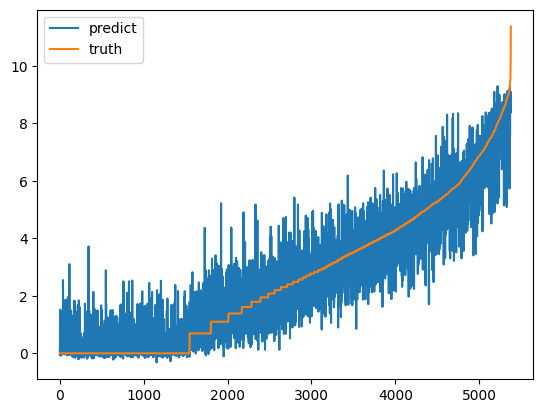

In [ ]:
df_comp = pd.DataFrame(zip(y_pred, y_test), columns=['predict', 'truth'])
print(df_comp.describe())
df_comp.sort_values('truth', axis=0, inplace=True)
plt.plot([i for i in range(df_comp.shape[0])], df_comp.predict)
plt.plot([i for i in range(df_comp.shape[0])], df_comp.truth)
plt.legend(['predict', 'truth'])
plt.show()

### Inverse Log to get True Values

In [ ]:
# Inverse log transformation to calculate true RMSE and R^2
y_test_exp = np.exp(y_test)  # Inverse log transformation on the actual values
y_pred_exp = np.exp(y_pred)  # Inverse log transformation on the predicted values

# Calculate true MSE, RMSE, and R2
true_mse = mean_squared_error(y_test_exp, y_pred_exp)
true_rmse = np.sqrt(true_mse)
true_r2 = r2_score(y_test_exp, y_pred_exp)

print('True XGBoost MSE:', true_mse)
print('True XGBoost RMSE:', true_rmse)
print('True XGBoost R2:', true_r2)


True XGBoost MSE: 1790311.3887912687
True XGBoost RMSE: 1338.0251824204463
True XGBoost R2: 0.3951336212619284


            predict         truth
count   5378.000000   5378.000000
mean     230.504074    326.491633
std      829.313965   1720.580297
min        0.727383      1.000000
25%        1.666609      1.000000
50%       10.129420     10.000000
75%       72.623558     76.750000
max    10822.071289  86365.000000


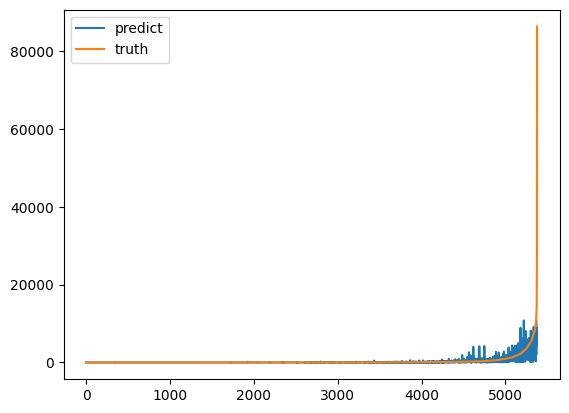

In [ ]:
df_comp = pd.DataFrame(zip(y_pred_exp, y_test_exp), columns=['predict', 'truth'])
print(df_comp.describe())
df_comp.sort_values('truth', axis=0, inplace=True)
plt.plot([i for i in range(df_comp.shape[0])], df_comp.predict)
plt.plot([i for i in range(df_comp.shape[0])], df_comp.truth)
plt.legend(['predict', 'truth'])
plt.show()

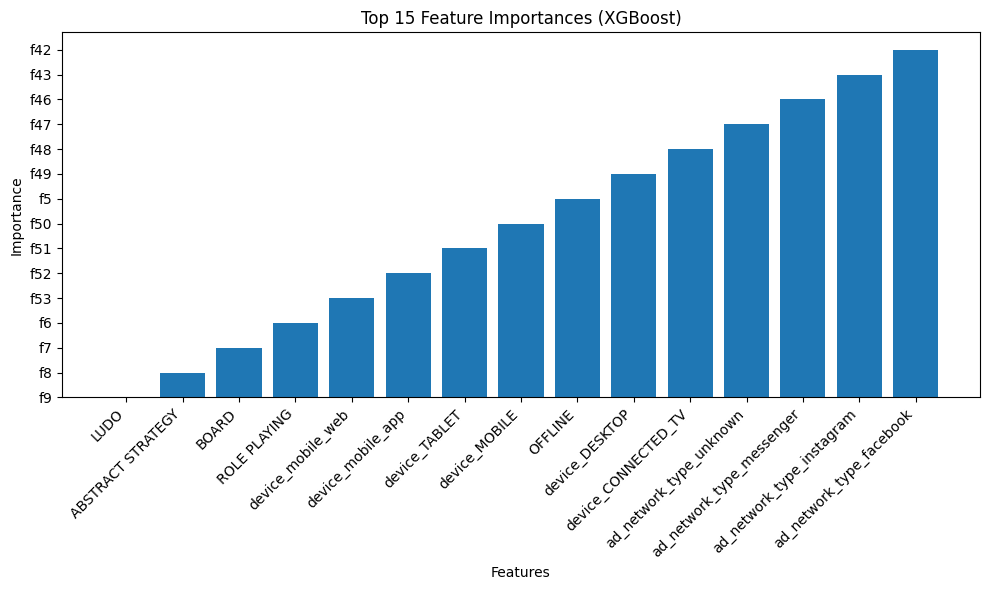

In [ ]:
importances = model.get_booster().get_score(importance_type='weight')
feature_importances = [(feature, score) for feature, score in zip(X.columns, importances)]
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Slice for top 15 features
top_features = feature_importances[:15]
features, scores = zip(*top_features)

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(features, scores)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.title('Top 15 Feature Importances (XGBoost)')
plt.tight_layout()
plt.show()


In [ ]:
top_features

[('LUDO', 'f9'),
 ('ABSTRACT STRATEGY', 'f8'),
 ('BOARD', 'f7'),
 ('ROLE PLAYING', 'f6'),
 ('device_mobile_web', 'f53'),
 ('device_mobile_app', 'f52'),
 ('device_TABLET', 'f51'),
 ('device_MOBILE', 'f50'),
 ('OFFLINE', 'f5'),
 ('device_DESKTOP', 'f49'),
 ('device_CONNECTED_TV', 'f48'),
 ('ad_network_type_unknown', 'f47'),
 ('ad_network_type_messenger', 'f46'),
 ('ad_network_type_instagram', 'f43'),
 ('ad_network_type_facebook', 'f42')]

### Tuning HyperParameters

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.9}
Best score: 0.8986437116678072
XGBoost MSE: 0.5909433734176862
XGBoost RMSE: 0.7687284133019191
XGBoost R2: 0.901652645054033
           predict        truth
count  5378.000000  5378.000000
mean      2.654516     2.654589
std       2.320600     2.451500
min      -0.496674     0.000000
25%       0.472863     0.000000
50%       2.346992     2.302585
75%       4.316361     4.340537
max       9.333799    11.366338


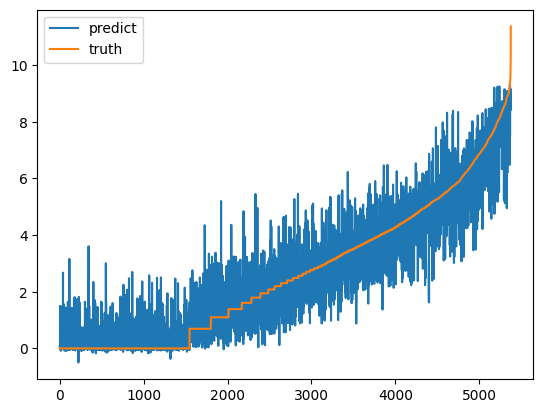

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Create the model
xgbr = xgb.XGBRegressor()

parameters = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
}

grid_search = GridSearchCV(estimator=xgbr, param_grid=parameters, scoring='r2', cv=3, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Fit model with best parameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('XGBoost MSE:', mse)
print('XGBoost RMSE:', rmse)
print('XGBoost R2:', r2)

df_comp = pd.DataFrame(zip(y_pred, y_test), columns=['predict', 'truth'])
print(df_comp.describe())
df_comp.sort_values('truth', axis=0, inplace=True)
plt.plot([i for i in range(df_comp.shape[0])], df_comp.predict)
plt.plot([i for i in range(df_comp.shape[0])], df_comp.truth)
plt.legend(['predict', 'truth'])
plt.show()

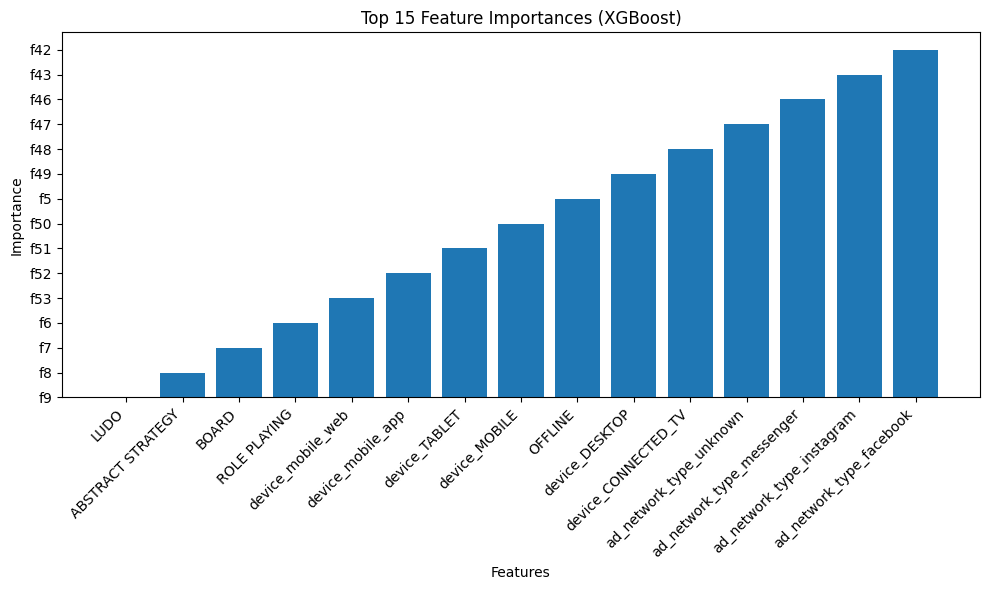

In [ ]:
importances = best_model.get_booster().get_score(importance_type='weight')
feature_importances = [(feature, score) for feature, score in zip(X.columns, importances)]
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Slice for top 15 features
top_features = feature_importances[:15]
features, scores = zip(*top_features)

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(features, scores)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.title('Top 15 Feature Importances (XGBoost)')
plt.tight_layout()
plt.show()


In [ ]:
top_features

[('LUDO', 'f9'),
 ('ABSTRACT STRATEGY', 'f8'),
 ('BOARD', 'f7'),
 ('ROLE PLAYING', 'f6'),
 ('device_mobile_web', 'f53'),
 ('device_mobile_app', 'f52'),
 ('device_TABLET', 'f51'),
 ('device_MOBILE', 'f50'),
 ('OFFLINE', 'f5'),
 ('device_DESKTOP', 'f49'),
 ('device_CONNECTED_TV', 'f48'),
 ('ad_network_type_unknown', 'f47'),
 ('ad_network_type_messenger', 'f46'),
 ('ad_network_type_instagram', 'f43'),
 ('ad_network_type_facebook', 'f42')]

## Ensemble of RF and XGBoost

In [ ]:
from sklearn.ensemble import RandomForestRegressor, StackingRegressor

# Ensemble (Stacking) with XGBoost as final estimator
estimators = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('xgb', xgb.XGBRegressor(n_estimators=100, learning_rate=0.1))
]
ensemble = StackingRegressor(estimators=estimators, final_estimator=xgb.XGBRegressor())

ensemble.fit(X_train, y_train)
ensemble_pred = ensemble.predict(X_test)

ensemble_mse = mean_squared_error(y_test, ensemble_pred)
ensemble_rmse = np.sqrt(ensemble_mse)
ensemble_r2 = r2_score(y_test, ensemble_pred)

print('Ensemble MSE:', ensemble_mse)
print('Ensemble RMSE:', ensemble_rmse)
print('Ensemble R2:', ensemble_r2)

Ensemble MSE: 0.6389051712701523
Ensemble RMSE: 0.7993154391541254
Ensemble R2: 0.8936706349843317


In [ ]:
# Inverse log transformation to calculate true RMSE and R^2
y_test_exp = np.exp(y_test)  # Inverse log transformation on the actual values
y_pred_exp = np.exp(ensemble_pred)  # Inverse log transformation on the predicted values

# Calculate true MSE, RMSE, and R2
true_mse = mean_squared_error(y_test_exp, y_pred_exp)
true_rmse = np.sqrt(true_mse)
true_r2 = r2_score(y_test_exp, y_pred_exp)

print('True Ensemble MSE:', true_mse)
print('True Ensemble RMSE:', true_rmse)
print('True Ensemble R2:', true_r2)

True Ensemble MSE: 1203362.8929451958
True Ensemble RMSE: 1096.9789847327047
True Ensemble R2: 0.5934373428440539


# Installs

In [ ]:
import numpy as np
def log_transform(x):
    return np.log(x[x > 0])

df.installs = log_transform(df.installs)
df['installs'].fillna(0, inplace=True)


In [ ]:
df_sampled = df

In [ ]:
X = df_sampled.drop(['clicks','installs','purchase','purchase_value','impressions'],
            axis=1)
y = df_sampled['installs']

In [ ]:
df_sampled.shape

(26887, 59)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Choose your scaler
scaler = StandardScaler()

# Fit the scaler to your data
scaler.fit(X_train)

# Transform training and test sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

model = LinearRegression()

# Fit the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Linear Regression MSE:', mse)
print('Linear Regression RMSE:', rmse)
print('Linear Regression R2:', r2)


Linear Regression MSE: 2.494114156606646
Linear Regression RMSE: 1.5792764661726097
Linear Regression R2: 0.4179069115342168


In [ ]:
# Inverse log transformation to calculate true RMSE and R^2
y_test_exp = np.exp(y_test)  # Inverse log transformation on the actual values
y_pred_exp = np.exp(y_pred)  # Inverse log transformation on the predicted values

# Calculate true MSE, RMSE, and R2
true_mse = mean_squared_error(y_test_exp, y_pred_exp)
true_rmse = np.sqrt(true_mse)
true_r2 = r2_score(y_test_exp, y_pred_exp)

print('True Ensemble MSE:', true_mse)
print('True Ensemble RMSE:', true_rmse)
print('True Ensemble R2:', true_r2)

True Ensemble MSE: 18259118564.716705
True Ensemble RMSE: 135126.30596858892
True Ensemble R2: -174451.8534854801


## SVR

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Create the model (adjust parameters as needed)
svr_model = SVR(kernel='rbf', C=1.0)

# Fit the model on the training set
svr_model.fit(X_train, y_train)

# Make predictions on the test set
svr_pred = svr_model.predict(X_test)

# Evaluate performance
svr_mse = mean_squared_error(y_test, svr_pred)
svr_rmse = np.sqrt(svr_mse)
svr_r2 = r2_score(y_test, svr_pred)

print('SVR MSE:', svr_mse)
print('SVR RMSE:', svr_rmse)
print('SVR R2:', svr_r2)

SVR MSE: 1.755140501683336
SVR RMSE: 1.3248171578309724
SVR R2: 0.5903735389938026


In [ ]:
# Inverse log transformation to calculate true RMSE and R^2
y_test_exp = np.exp(y_test)  # Inverse log transformation on the actual values
y_pred_exp = np.exp(svr_pred)  # Inverse log transformation on the predicted values

# Calculate true MSE, RMSE, and R2
true_mse = mean_squared_error(y_test_exp, y_pred_exp)
true_rmse = np.sqrt(true_mse)
true_r2 = r2_score(y_test_exp, y_pred_exp)

print('True Ensemble MSE:', true_mse)
print('True Ensemble RMSE:', true_rmse)
print('True Ensemble R2:', true_r2)

True Ensemble MSE: 74717.89791389558
True Ensemble RMSE: 273.3457479345446
True Ensemble R2: 0.2861237824095304


## Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create the model (adjust parameters as needed)
dt_model = DecisionTreeRegressor(max_depth=6, random_state=42)

# Fit the model on the training set
dt_model.fit(X_train, y_train)

# Make predictions on the test set
dt_pred = dt_model.predict(X_test)

# Evaluate performance
dt_mse = mean_squared_error(y_test, dt_pred)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, dt_pred)

print('Decision Tree MSE:', dt_mse)
print('Decision Tree RMSE:', dt_rmse)
print('Decision Tree R2:', dt_r2)


Decision Tree MSE: 1.1320378060058134
Decision Tree RMSE: 1.0639726528467794
Decision Tree R2: 0.7357974249043653


In [ ]:
# Inverse log transformation to calculate true RMSE and R^2
y_test_exp = np.exp(y_test)  # Inverse log transformation on the actual values
y_pred_exp = np.exp(dt_pred)  # Inverse log transformation on the predicted values

# Calculate true MSE, RMSE, and R2
true_mse = mean_squared_error(y_test_exp, y_pred_exp)
true_rmse = np.sqrt(true_mse)
true_r2 = r2_score(y_test_exp, y_pred_exp)

print('True DT MSE:', true_mse)
print('True DT RMSE:', true_rmse)
print('True DT R2:', true_r2)

True DT MSE: 59186.97749705337
True DT RMSE: 243.28373866136917
True DT R2: 0.434510648641376


## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create the model (adjust parameters as needed)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training set
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_pred = rf_model.predict(X_test)

# Evaluate performance
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_pred)

print('Random Forest MSE:', rf_mse)
print('Random Forest RMSE:', rf_rmse)
print('Random Forest R2:', rf_r2)

Random Forest MSE: 0.6807864101700982
Random Forest RMSE: 0.8250978185464426
Random Forest R2: 0.8411135019494841


In [ ]:
# Inverse log transformation to calculate true RMSE and R^2
y_test_exp = np.exp(y_test)  # Inverse log transformation on the actual values
y_pred_exp = np.exp(rf_pred)  # Inverse log transformation on the predicted values

# Calculate true MSE, RMSE, and R2
true_mse = mean_squared_error(y_test_exp, y_pred_exp)
true_rmse = np.sqrt(true_mse)
true_r2 = r2_score(y_test_exp, y_pred_exp)

print('True RF MSE:', true_mse)
print('True RF RMSE:', true_rmse)
print('True Rf R2:', true_r2)

True RF MSE: 34125.75124193251
True RF RMSE: 184.73156536426714
True Rf R2: 0.6739527891015061


## XGBoost

In [ ]:
import xgboost as xgb

# Create the model (adjust parameters as needed)
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1)

# Fit the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate performance (same metrics as before)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('XGBoost MSE:', mse)
print('XGBoost RMSE:', rmse)
print('XGBoost R2:', r2)


XGBoost MSE: 0.6006669812934606
XGBoost RMSE: 0.7750270842321968
XGBoost R2: 0.859812311575892


           predict        truth
count  5378.000000  5378.000000
mean      1.802572     1.789599
std       1.910598     2.070152
min      -0.517771     0.000000
25%       0.136404     0.000000
50%       1.110187     1.098612
75%       3.012243     3.178054
max       8.271772     8.594895


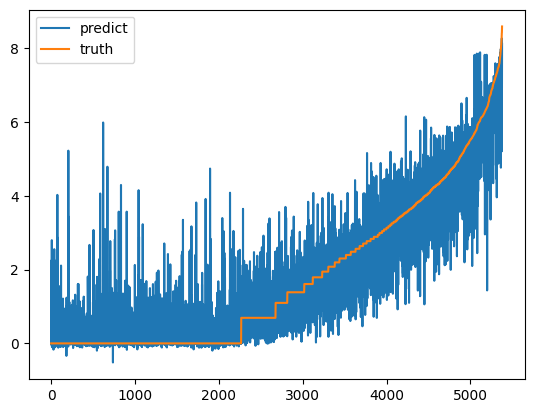

In [ ]:
df_comp = pd.DataFrame(zip(y_pred, y_test), columns=['predict', 'truth'])
print(df_comp.describe())
df_comp.sort_values('truth', axis=0, inplace=True)
plt.plot([i for i in range(df_comp.shape[0])], df_comp.predict)
plt.plot([i for i in range(df_comp.shape[0])], df_comp.truth)
plt.legend(['predict', 'truth'])
plt.show()

In [ ]:
# Inverse log transformation to calculate true RMSE and R^2
y_test_exp = np.exp(y_test)  # Inverse log transformation on the actual values
y_pred_exp = np.exp(y_pred)  # Inverse log transformation on the predicted values

# Calculate true MSE, RMSE, and R2
true_mse = mean_squared_error(y_test_exp, y_pred_exp)
true_rmse = np.sqrt(true_mse)
true_r2 = r2_score(y_test_exp, y_pred_exp)

print('True XG MSE:', true_mse)
print('True XG RMSE:', true_rmse)
print('True XG R2:', true_r2)

True XG MSE: 37062.609374001164
True XG RMSE: 192.5165171459352
True XG R2: 0.6458932045380186


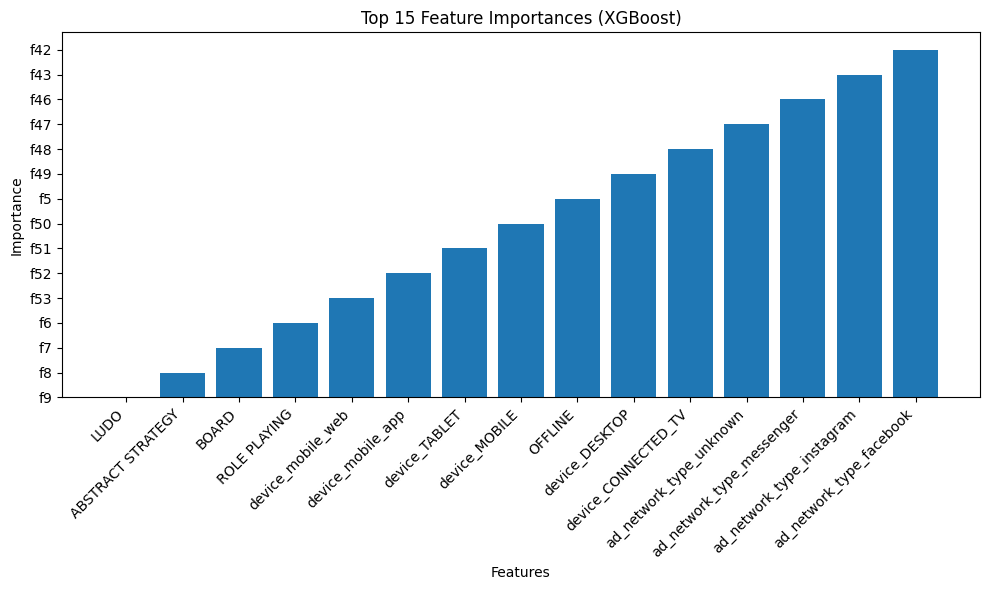

In [ ]:
importances = model.get_booster().get_score(importance_type='weight')
feature_importances = [(feature, score) for feature, score in zip(X.columns, importances)]
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Slice for top 15 features
top_features = feature_importances[:15]
features, scores = zip(*top_features)

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(features, scores)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.title('Top 15 Feature Importances (XGBoost)')
plt.tight_layout()
plt.show()


In [ ]:
top_features

[('LUDO', 'f9'),
 ('ABSTRACT STRATEGY', 'f8'),
 ('BOARD', 'f7'),
 ('ROLE PLAYING', 'f6'),
 ('device_mobile_web', 'f53'),
 ('device_mobile_app', 'f52'),
 ('device_TABLET', 'f51'),
 ('device_MOBILE', 'f50'),
 ('OFFLINE', 'f5'),
 ('device_DESKTOP', 'f49'),
 ('device_CONNECTED_TV', 'f48'),
 ('ad_network_type_unknown', 'f47'),
 ('ad_network_type_messenger', 'f46'),
 ('ad_network_type_instagram', 'f43'),
 ('ad_network_type_facebook', 'f42')]

### Tuning HyperParameters

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 50, 'subsample': 0.8}
Best score: 0.8621169433802004
XGBoost MSE: 0.6011329135996724
XGBoost RMSE: 0.7753276169463282
XGBoost R2: 0.859703569169527
           predict        truth
count  5378.000000  5378.000000
mean      1.801110     1.789599
std       1.884720     2.070152
min      -0.356385     0.000000
25%       0.145085     0.000000
50%       1.138671     1.098612
75%       2.967624     3.178054
max       8.016211     8.594895


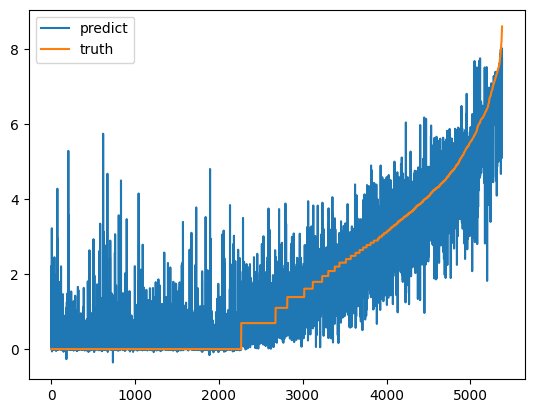

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Create the model
xgbr = xgb.XGBRegressor()

parameters = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
}

grid_search = GridSearchCV(estimator=xgbr, param_grid=parameters, scoring='r2', cv=3, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Fit model with best parameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('XGBoost MSE:', mse)
print('XGBoost RMSE:', rmse)
print('XGBoost R2:', r2)

df_comp = pd.DataFrame(zip(y_pred, y_test), columns=['predict', 'truth'])
print(df_comp.describe())
df_comp.sort_values('truth', axis=0, inplace=True)
plt.plot([i for i in range(df_comp.shape[0])], df_comp.predict)
plt.plot([i for i in range(df_comp.shape[0])], df_comp.truth)
plt.legend(['predict', 'truth'])
plt.show()

In [ ]:
importances = best_model.get_booster().get_score(importance_type='weight')
feature_importances = [(feature, score) for feature, score in zip(X.columns, importances)]
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Slice for top 15 features
top_features = feature_importances[:15]
features, scores = zip(*top_features)

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(features, scores)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.title('Top 15 Feature Importances (XGBoost)')
plt.tight_layout()
plt.show()


In [ ]:
top_features

## Ensemble of RF and XGBoost

In [ ]:
from sklearn.ensemble import RandomForestRegressor, StackingRegressor

# Ensemble (Stacking) with XGBoost as final estimator
estimators = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('xgb', xgb.XGBRegressor(n_estimators=100, learning_rate=0.1))
]
ensemble = StackingRegressor(estimators=estimators, final_estimator=xgb.XGBRegressor())

ensemble.fit(X_train, y_train)
ensemble_pred = ensemble.predict(X_test)

ensemble_mse = mean_squared_error(y_test, ensemble_pred)
ensemble_rmse = np.sqrt(ensemble_mse)
ensemble_r2 = r2_score(y_test, ensemble_pred)

print('Ensemble MSE:', ensemble_mse)
print('Ensemble RMSE:', ensemble_rmse)
print('Ensemble R2:', ensemble_r2)

Ensemble MSE: 0.634533980930176
Ensemble RMSE: 0.7965764124866967
Ensemble R2: 0.851908204074082


In [ ]:
# Inverse log transformation to calculate true RMSE and R^2
y_test_exp = np.exp(y_test)  # Inverse log transformation on the actual values
y_pred_exp = np.exp(ensemble_pred)  # Inverse log transformation on the predicted values

# Calculate true MSE, RMSE, and R2
true_mse = mean_squared_error(y_test_exp, y_pred_exp)
true_rmse = np.sqrt(true_mse)
true_r2 = r2_score(y_test_exp, y_pred_exp)

print('True Ensemble MSE:', true_mse)
print('True Ensemble RMSE:', true_rmse)
print('True Ensemble R2:', true_r2)

True Ensemble MSE: 35187.3295267527
True Ensemble RMSE: 187.58286042907199
True Ensemble R2: 0.6638101658237884


# Purchases - With sampling for balanced data

In [ ]:
import numpy as np
def log_transform(x):
    return np.log(x[x > 0])

df.purchase = log_transform(df.purchase)
df['purchase'].fillna(0, inplace=True)


In [ ]:
df_positive = df[df.purchase > 0]
df_zero = df[df.purchase == 0]

# Determine the number of samples needed for a 50/50 split
sample_size = min(len(df_positive), len(df_zero))

# Sample equally from positive and zero cases
df_sampled = pd.concat([
    df_positive.sample(sample_size),
    df_zero.sample(sample_size)
])

# Shuffle for good measure
df_sampled = df_sampled.sample(frac=1).reset_index(drop=True)

In [ ]:
# df_sampled = df

In [ ]:
X = df_sampled.drop(['clicks','installs','purchase','purchase_value','impressions'],
            axis=1)
y = df_sampled['purchase']

In [ ]:
df_sampled.shape

(3492, 59)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Choose your scaler
scaler = StandardScaler()

# Fit the scaler to your data
scaler.fit(X_train)

# Transform training and test sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

model = LinearRegression()

# Fit the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Linear Regression MSE:', mse)
print('Linear Regression RMSE:', rmse)
print('Linear Regression R2:', r2)


Linear Regression MSE: 291954204063766.3
Linear Regression RMSE: 17086667.435862567
Linear Regression R2: -76264902885276.67


In [ ]:
# Inverse log transformation to calculate true RMSE and R^2
y_test_exp = np.exp(y_test)  # Inverse log transformation on the actual values
y_pred_exp = np.exp(y_pred)  # Inverse log transformation on the predicted values

# Calculate true MSE, RMSE, and R2
true_mse = mean_squared_error(y_test_exp, y_pred_exp)
true_rmse = np.sqrt(true_mse)
true_r2 = r2_score(y_test_exp, y_pred_exp)

print('True LR MSE:', true_mse)
print('True LR RMSE:', true_rmse)
print('True Lr R2:', true_r2)

True LR MSE: 171612.38387336602
True LR RMSE: 414.26125075049686
True Lr R2: -5.887109271490915


## SVR

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Create the model (adjust parameters as needed)
svr_model = SVR(kernel='rbf', C=1.0)

# Fit the model on the training set
svr_model.fit(X_train, y_train)

# Make predictions on the test set
svr_pred = svr_model.predict(X_test)

# Evaluate performance
svr_mse = mean_squared_error(y_test, svr_pred)
svr_rmse = np.sqrt(svr_mse)
svr_r2 = r2_score(y_test, svr_pred)

print('SVR MSE:', svr_mse)
print('SVR RMSE:', svr_rmse)
print('SVR R2:', svr_r2)

SVR MSE: 1.030347322695839
SVR RMSE: 1.0150602556970887
SVR R2: 0.7308504641832754


In [ ]:
# Inverse log transformation to calculate true RMSE and R^2
y_test_exp = np.exp(y_test)  # Inverse log transformation on the actual values
y_pred_exp = np.exp(svr_pred)  # Inverse log transformation on the predicted values

# Calculate true MSE, RMSE, and R2
true_mse = mean_squared_error(y_test_exp, y_pred_exp)
true_rmse = np.sqrt(true_mse)
true_r2 = r2_score(y_test_exp, y_pred_exp)

print('True svr MSE:', true_mse)
print('True svr RMSE:', true_rmse)
print('True svr R2:', true_r2)

True svr MSE: 8664.491372732398
True svr RMSE: 93.08324968936354
True svr R2: 0.6522785971557177


## Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create the model (adjust parameters as needed)
dt_model = DecisionTreeRegressor(max_depth=6, random_state=42)

# Fit the model on the training set
dt_model.fit(X_train, y_train)

# Make predictions on the test set
dt_pred = dt_model.predict(X_test)

# Evaluate performance
dt_mse = mean_squared_error(y_test, dt_pred)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, dt_pred)

print('Decision Tree MSE:', dt_mse)
print('Decision Tree RMSE:', dt_rmse)
print('Decision Tree R2:', dt_r2)


Decision Tree MSE: 0.9333210841472005
Decision Tree RMSE: 0.9660854435023853
Decision Tree R2: 0.7561958661580985


In [ ]:
# Inverse log transformation to calculate true RMSE and R^2
y_test_exp = np.exp(y_test)  # Inverse log transformation on the actual values
y_pred_exp = np.exp(dt_pred)  # Inverse log transformation on the predicted values

# Calculate true MSE, RMSE, and R2
true_mse = mean_squared_error(y_test_exp, y_pred_exp)
true_rmse = np.sqrt(true_mse)
true_r2 = r2_score(y_test_exp, y_pred_exp)

print('True DT MSE:', true_mse)
print('True DT RMSE:', true_rmse)
print('True DT R2:', true_r2)

True DT MSE: 5356.891618776499
True DT RMSE: 73.19078916623661
True DT R2: 0.7850184403867289


## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create the model (adjust parameters as needed)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training set
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_pred = rf_model.predict(X_test)

# Evaluate performance
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_pred)

print('Random Forest MSE:', rf_mse)
print('Random Forest RMSE:', rf_rmse)
print('Random Forest R2:', rf_r2)

Random Forest MSE: 0.9201976575995167
Random Forest RMSE: 0.9592693352753003
Random Forest R2: 0.7596239957662702


In [ ]:
# Inverse log transformation to calculate true RMSE and R^2
y_test_exp = np.exp(y_test)  # Inverse log transformation on the actual values
y_pred_exp = np.exp(rf_pred)  # Inverse log transformation on the predicted values

# Calculate true MSE, RMSE, and R2
true_mse = mean_squared_error(y_test_exp, y_pred_exp)
true_rmse = np.sqrt(true_mse)
true_r2 = r2_score(y_test_exp, y_pred_exp)

print('True rf MSE:', true_mse)
print('True rf RMSE:', true_rmse)
print('True rf R2:', true_r2)

True rf MSE: 6006.674485220877
True rf RMSE: 77.50273856594279
True rf R2: 0.7589415017478062


## XGBoost

In [ ]:
import xgboost as xgb

# Create the model (adjust parameters as needed)
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1)

# Fit the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate performance (same metrics as before)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('XGBoost MSE:', mse)
print('XGBoost RMSE:', rmse)
print('XGBoost R2:', r2)


XGBoost MSE: 0.8148904799187411
XGBoost RMSE: 0.9027128446625433
XGBoost R2: 0.7871325624084305


          predict       truth
count  699.000000  699.000000
mean     1.473615    1.557308
std      1.767274    1.957969
min     -0.310508    0.000000
25%      0.030637    0.000000
50%      0.768071    0.000000
75%      2.487573    3.020127
max      7.593858    7.745868


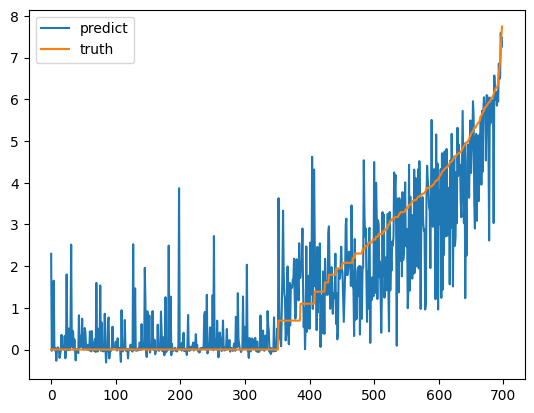

In [ ]:
df_comp = pd.DataFrame(zip(y_pred, y_test), columns=['predict', 'truth'])
print(df_comp.describe())
df_comp.sort_values('truth', axis=0, inplace=True)
plt.plot([i for i in range(df_comp.shape[0])], df_comp.predict)
plt.plot([i for i in range(df_comp.shape[0])], df_comp.truth)
plt.legend(['predict', 'truth'])
plt.show()

In [ ]:
# Inverse log transformation to calculate true RMSE and R^2
y_test_exp = np.exp(y_test)  # Inverse log transformation on the actual values
y_pred_exp = np.exp(y_pred)  # Inverse log transformation on the predicted values

# Calculate true MSE, RMSE, and R2
true_mse = mean_squared_error(y_test_exp, y_pred_exp)
true_rmse = np.sqrt(true_mse)
true_r2 = r2_score(y_test_exp, y_pred_exp)

print('True XG MSE:', true_mse)
print('True XG RMSE:', true_rmse)
print('True XG R2:', true_r2)

True XG MSE: 3899.85590940902
True XG RMSE: 62.44882632531231
True XG R2: 0.8434918670497069


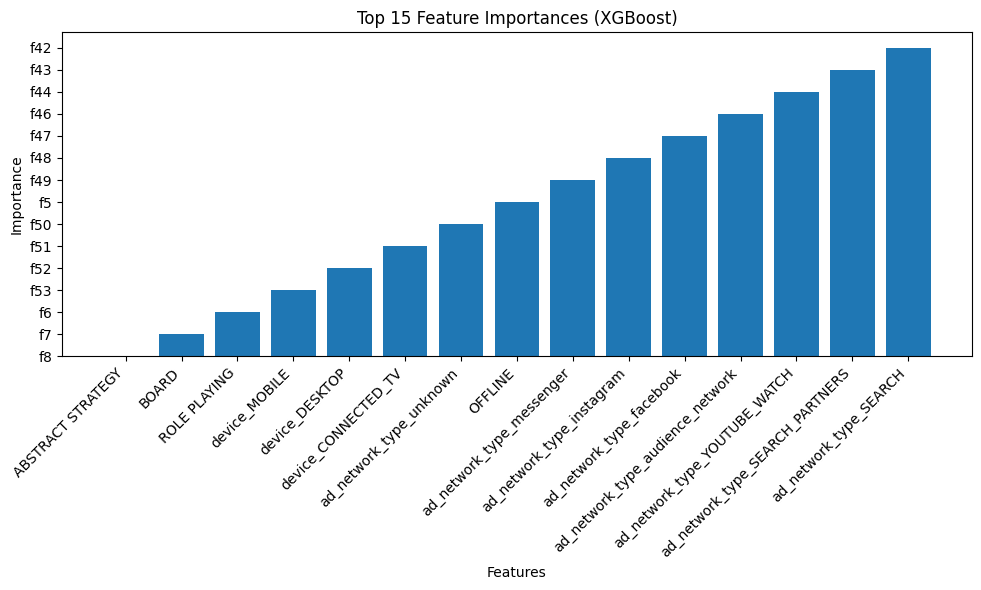

In [ ]:
importances = model.get_booster().get_score(importance_type='weight')
feature_importances = [(feature, score) for feature, score in zip(X.columns, importances)]
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Slice for top 15 features
top_features = feature_importances[:15]
features, scores = zip(*top_features)

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(features, scores)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.title('Top 15 Feature Importances (XGBoost)')
plt.tight_layout()
plt.show()


In [ ]:
top_features

[('ABSTRACT STRATEGY', 'f8'),
 ('BOARD', 'f7'),
 ('ROLE PLAYING', 'f6'),
 ('device_MOBILE', 'f53'),
 ('device_DESKTOP', 'f52'),
 ('device_CONNECTED_TV', 'f51'),
 ('ad_network_type_unknown', 'f50'),
 ('OFFLINE', 'f5'),
 ('ad_network_type_messenger', 'f49'),
 ('ad_network_type_instagram', 'f48'),
 ('ad_network_type_facebook', 'f47'),
 ('ad_network_type_audience_network', 'f46'),
 ('ad_network_type_YOUTUBE_WATCH', 'f44'),
 ('ad_network_type_SEARCH_PARTNERS', 'f43'),
 ('ad_network_type_SEARCH', 'f42')]

### Tuning HyperParameters

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 0.8}
Best score: 0.7752736031793813
XGBoost MSE: 0.7674733634545883
XGBoost RMSE: 0.8760555709854189
XGBoost R2: 0.7630246851664834
          predict       truth
count  699.000000  699.000000
mean     1.425602    1.421875
std      1.567231    1.800906
min     -0.278159    0.000000
25%      0.078625    0.000000
50%      1.005247    0.000000
75%      2.219861    2.708050
max      7.881666    7.979681


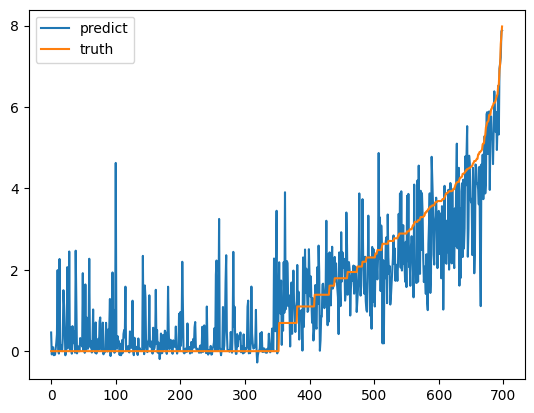

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Create the model
xgbr = xgb.XGBRegressor()

parameters = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
}

grid_search = GridSearchCV(estimator=xgbr, param_grid=parameters, scoring='r2', cv=3, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Fit model with best parameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('XGBoost MSE:', mse)
print('XGBoost RMSE:', rmse)
print('XGBoost R2:', r2)

df_comp = pd.DataFrame(zip(y_pred, y_test), columns=['predict', 'truth'])
print(df_comp.describe())
df_comp.sort_values('truth', axis=0, inplace=True)
plt.plot([i for i in range(df_comp.shape[0])], df_comp.predict)
plt.plot([i for i in range(df_comp.shape[0])], df_comp.truth)
plt.legend(['predict', 'truth'])
plt.show()

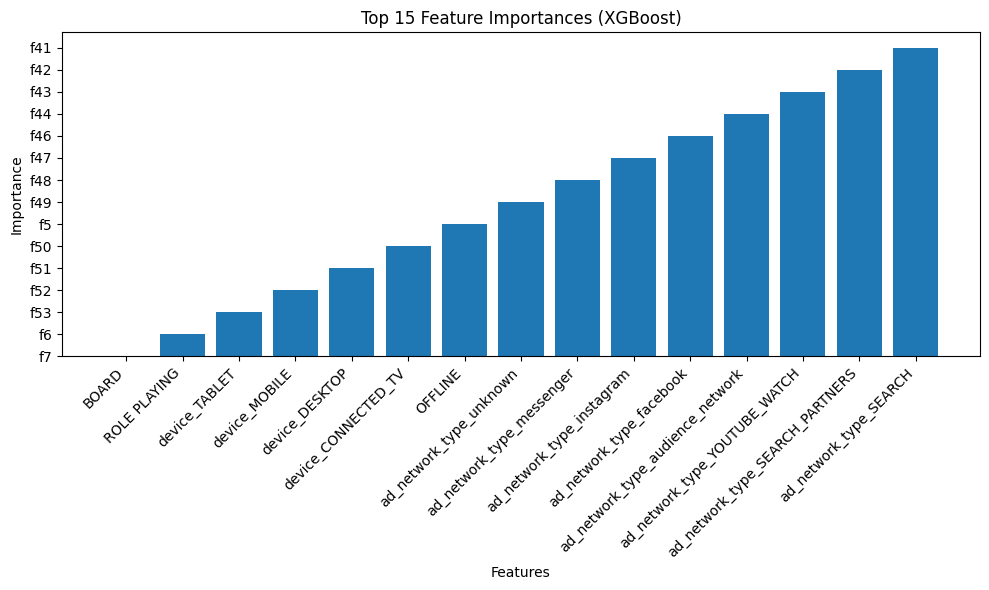

In [ ]:
importances = best_model.get_booster().get_score(importance_type='weight')
feature_importances = [(feature, score) for feature, score in zip(X.columns, importances)]
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Slice for top 15 features
top_features = feature_importances[:15]
features, scores = zip(*top_features)

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(features, scores)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.title('Top 15 Feature Importances (XGBoost)')
plt.tight_layout()
plt.show()


In [ ]:
top_features

[('BOARD', 'f7'),
 ('ROLE PLAYING', 'f6'),
 ('device_TABLET', 'f53'),
 ('device_MOBILE', 'f52'),
 ('device_DESKTOP', 'f51'),
 ('device_CONNECTED_TV', 'f50'),
 ('OFFLINE', 'f5'),
 ('ad_network_type_unknown', 'f49'),
 ('ad_network_type_messenger', 'f48'),
 ('ad_network_type_instagram', 'f47'),
 ('ad_network_type_facebook', 'f46'),
 ('ad_network_type_audience_network', 'f44'),
 ('ad_network_type_YOUTUBE_WATCH', 'f43'),
 ('ad_network_type_SEARCH_PARTNERS', 'f42'),
 ('ad_network_type_SEARCH', 'f41')]

## Ensemble of RF and XGBoost

In [ ]:
from sklearn.ensemble import RandomForestRegressor, StackingRegressor

# Ensemble (Stacking) with XGBoost as final estimator
estimators = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('xgb', xgb.XGBRegressor(n_estimators=100, learning_rate=0.1))
]
ensemble = StackingRegressor(estimators=estimators, final_estimator=xgb.XGBRegressor())

ensemble.fit(X_train, y_train)
ensemble_pred = ensemble.predict(X_test)

ensemble_mse = mean_squared_error(y_test, ensemble_pred)
ensemble_rmse = np.sqrt(ensemble_mse)
ensemble_r2 = r2_score(y_test, ensemble_pred)

print('Ensemble MSE:', ensemble_mse)
print('Ensemble RMSE:', ensemble_rmse)
print('Ensemble R2:', ensemble_r2)

Ensemble MSE: 1.0703782224309706
Ensemble RMSE: 1.0345908478383958
Ensemble R2: 0.7203935067625037


In [ ]:
# Inverse log transformation to calculate true RMSE and R^2
y_test_exp = np.exp(y_test)  # Inverse log transformation on the actual values
y_pred_exp = np.exp(ensemble_pred)  # Inverse log transformation on the predicted values

# Calculate true MSE, RMSE, and R2
true_mse = mean_squared_error(y_test_exp, y_pred_exp)
true_rmse = np.sqrt(true_mse)
true_r2 = r2_score(y_test_exp, y_pred_exp)

print('True Ensemble MSE:', true_mse)
print('True Ensemble RMSE:', true_rmse)
print('True Ensemble R2:', true_r2)

True Ensemble MSE: 9371.085458986547
True Ensemble RMSE: 96.80436694171676
True Ensemble R2: 0.6239217235269907


# Impressions

In [ ]:
df.impressions.value_counts()

impressions
1        903
2        556
3        362
4        347
5        261
        ... 
16029      1
2857       1
7776       1
8789       1
4762       1
Name: count, Length: 9054, dtype: int64

In [ ]:
# Function to handle log transformation with non-zero values
import numpy as np
def log_transform(x):
    return np.log(x[x > 0])

df.impressions = log_transform(df.impressions)
df['impressions'].fillna(0, inplace=True)

In [ ]:
df_sampled = df

In [ ]:
X = df_sampled.drop(['clicks','installs','purchase','purchase_value','impressions'],
            axis=1)
# y = df[['clicks','installs','purchase','purchase_value','impressions']]
y = df_sampled['impressions']

In [ ]:
df_sampled.shape

(26878, 60)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Choose your scaler
scaler = StandardScaler()

# Fit the scaler to your data
scaler.fit(X_train)

# Transform training and test sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

model = LinearRegression()

# Fit the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Linear Regression MSE:', mse)
print('Linear Regression RMSE:', rmse)
print('Linear Regression R2:', r2)


Linear Regression MSE: 4.772367986115912
Linear Regression RMSE: 2.1845750127006194
Linear Regression R2: 0.4891840876527762


In [ ]:
# Inverse log transformation to calculate true RMSE and R^2
y_test_exp = np.exp(y_test)  # Inverse log transformation on the actual values
y_pred_exp = np.exp(y_pred)  # Inverse log transformation on the predicted values

# Calculate true MSE, RMSE, and R2
true_mse = mean_squared_error(y_test_exp, y_pred_exp)
true_rmse = np.sqrt(true_mse)
true_r2 = r2_score(y_test_exp, y_pred_exp)

print('True LR MSE:', true_mse)
print('True LR RMSE:', true_rmse)
print('True LR R2:', true_r2)

True LR MSE: 125904657147246.33
True LR RMSE: 11220724.448414475
True LR R2: -4188.580393039366


## SVR

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Create the model (adjust parameters as needed)
svr_model = SVR(kernel='rbf', C=1.0)

# Fit the model on the training set
svr_model.fit(X_train, y_train)

# Make predictions on the test set
svr_pred = svr_model.predict(X_test)

# Evaluate performance
svr_mse = mean_squared_error(y_test, svr_pred)
svr_rmse = np.sqrt(svr_mse)
svr_r2 = r2_score(y_test, svr_pred)

print('SVR MSE:', svr_mse)
print('SVR RMSE:', svr_rmse)
print('SVR R2:', svr_r2)

SVR MSE: 3.2902152826834494
SVR RMSE: 1.8138950583436324
SVR R2: 0.6478280119361474


In [ ]:
# Inverse log transformation to calculate true RMSE and R^2
y_test_exp = np.exp(y_test)  # Inverse log transformation on the actual values
y_pred_exp = np.exp(svr_pred)  # Inverse log transformation on the predicted values

# Calculate true MSE, RMSE, and R2
true_mse = mean_squared_error(y_test_exp, y_pred_exp)
true_rmse = np.sqrt(true_mse)
true_r2 = r2_score(y_test_exp, y_pred_exp)

print('True SVR MSE:', true_mse)
print('True SVR RMSE:', true_rmse)
print('True SVR R2:', true_r2)

True SVR MSE: 27058547247.07608
True SVR RMSE: 164494.82437777816
True SVR R2: 0.09960472011849919


## Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create the model (adjust parameters as needed)
dt_model = DecisionTreeRegressor(max_depth=6, random_state=42)

# Fit the model on the training set
dt_model.fit(X_train, y_train)

# Make predictions on the test set
dt_pred = dt_model.predict(X_test)

# Evaluate performance
dt_mse = mean_squared_error(y_test, dt_pred)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, dt_pred)

print('Decision Tree MSE:', dt_mse)
print('Decision Tree RMSE:', dt_rmse)
print('Decision Tree R2:', dt_r2)


Decision Tree MSE: 1.3033339761759337
Decision Tree RMSE: 1.141636534180618
Decision Tree R2: 0.8604961444569387


In [ ]:
# Inverse log transformation to calculate true RMSE and R^2
y_test_exp = np.exp(y_test)  # Inverse log transformation on the actual values
y_pred_exp = np.exp(dt_pred)  # Inverse log transformation on the predicted values

# Calculate true MSE, RMSE, and R2
true_mse = mean_squared_error(y_test_exp, y_pred_exp)
true_rmse = np.sqrt(true_mse)
true_r2 = r2_score(y_test_exp, y_pred_exp)

print('True DT MSE:', true_mse)
print('True DT RMSE:', true_rmse)
print('True DT R2:', true_r2)

True DT MSE: 12809462842.799046
True DT RMSE: 113178.89751538953
True DT R2: 0.5737546522302657


## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create the model (adjust parameters as needed)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training set
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_pred = rf_model.predict(X_test)

# Evaluate performance
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_pred)

print('Random Forest MSE:', rf_mse)
print('Random Forest RMSE:', rf_rmse)
print('Random Forest R2:', rf_r2)

Random Forest MSE: 0.5572210311733267
Random Forest RMSE: 0.7464723914340883
Random Forest R2: 0.9403572041707702


In [ ]:
# Inverse log transformation to calculate true RMSE and R^2
y_test_exp = np.exp(y_test)  # Inverse log transformation on the actual values
y_pred_exp = np.exp(rf_pred)  # Inverse log transformation on the predicted values

# Calculate true MSE, RMSE, and R2
true_mse = mean_squared_error(y_test_exp, y_pred_exp)
true_rmse = np.sqrt(true_mse)
true_r2 = r2_score(y_test_exp, y_pred_exp)

print('True rf MSE:', true_mse)
print('True rf RMSE:', true_rmse)
print('True rf R2:', true_r2)

True rf MSE: 10599136334.864714
True rf RMSE: 102952.10699575173
True rf R2: 0.6473050737132995


## XGBoost

In [ ]:
import xgboost as xgb

# Create the model (adjust parameters as needed)
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1)

# Fit the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate performance (same metrics as before)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('XGBoost MSE:', mse)
print('XGBoost RMSE:', rmse)
print('XGBoost R2:', r2)


XGBoost MSE: 0.6142102193521105
XGBoost RMSE: 0.7837156495516154
XGBoost R2: 0.9342573006767051


           predict        truth
count  5376.000000  5376.000000
mean      6.145902     6.125719
std       2.951784     3.056857
min      -0.017505     0.000000
25%       4.153611     4.025352
50%       6.185197     6.158037
75%       8.244373     8.181161
max      14.826997    15.412745


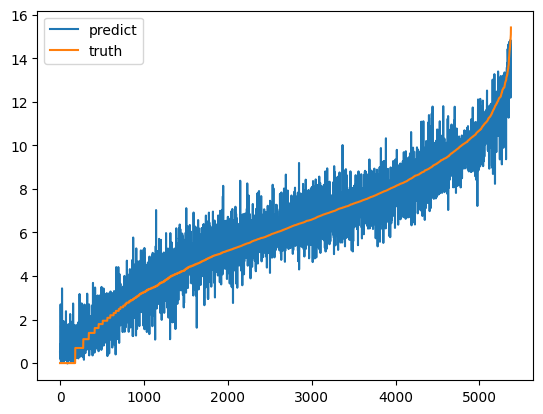

In [ ]:
df_comp = pd.DataFrame(zip(y_pred, y_test), columns=['predict', 'truth'])
print(df_comp.describe())
df_comp.sort_values('truth', axis=0, inplace=True)
plt.plot([i for i in range(df_comp.shape[0])], df_comp.predict)
plt.plot([i for i in range(df_comp.shape[0])], df_comp.truth)
plt.legend(['predict', 'truth'])
plt.show()

In [ ]:
# Inverse log transformation to calculate true RMSE and R^2
y_test_exp = np.exp(y_test)  # Inverse log transformation on the actual values
y_pred_exp = np.exp(y_pred)  # Inverse log transformation on the predicted values

# Calculate true MSE, RMSE, and R2
true_mse = mean_squared_error(y_test_exp, y_pred_exp)
true_rmse = np.sqrt(true_mse)
true_r2 = r2_score(y_test_exp, y_pred_exp)

print('True XGB MSE:', true_mse)
print('True XGB RMSE:', true_rmse)
print('True XGB R2:', true_r2)

True XGB MSE: 8261696111.9913435
True XGB RMSE: 90893.87279674766
True XGB R2: 0.7250853079757937


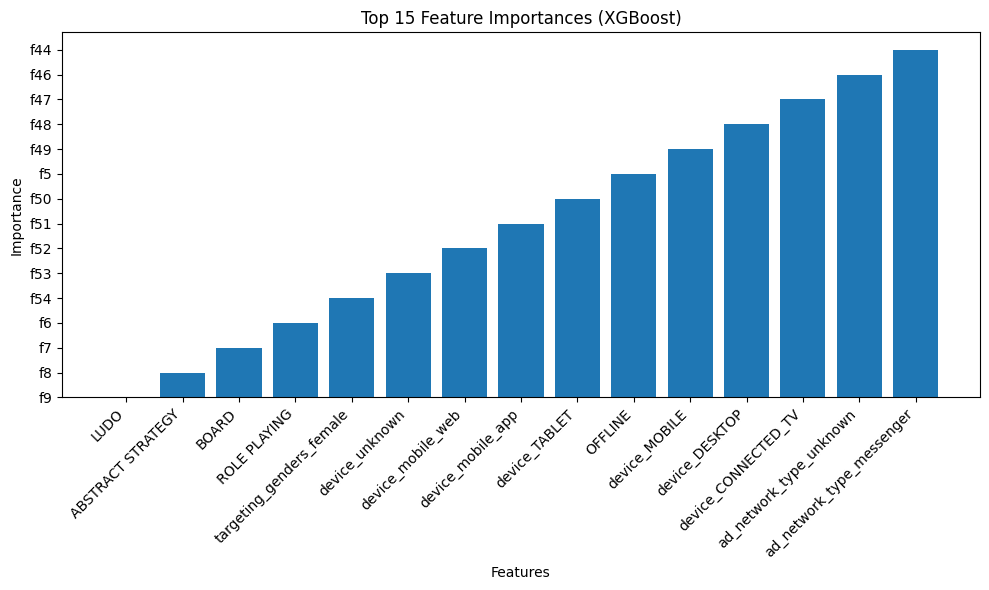

In [ ]:
importances = model.get_booster().get_score(importance_type='weight')
feature_importances = [(feature, score) for feature, score in zip(X.columns, importances)]
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Slice for top 15 features
top_features = feature_importances[:15]
features, scores = zip(*top_features)

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(features, scores)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.title('Top 15 Feature Importances (XGBoost)')
plt.tight_layout()
plt.show()


In [ ]:
top_features

[('LUDO', 'f9'),
 ('ABSTRACT STRATEGY', 'f8'),
 ('BOARD', 'f7'),
 ('ROLE PLAYING', 'f6'),
 ('targeting_genders_female', 'f54'),
 ('device_unknown', 'f53'),
 ('device_mobile_web', 'f52'),
 ('device_mobile_app', 'f51'),
 ('device_TABLET', 'f50'),
 ('OFFLINE', 'f5'),
 ('device_MOBILE', 'f49'),
 ('device_DESKTOP', 'f48'),
 ('device_CONNECTED_TV', 'f47'),
 ('ad_network_type_unknown', 'f46'),
 ('ad_network_type_messenger', 'f44')]

### Tuning HyperParameters

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.9}
Best score: 0.9434164778245414
XGBoost MSE: 0.5399180301715955
XGBoost RMSE: 0.7347911473143885
XGBoost R2: 0.9422092508420995
           predict        truth
count  5376.000000  5376.000000
mean      6.152889     6.125719
std       2.972835     3.056857
min      -0.446425     0.000000
25%       4.109121     4.025352
50%       6.172624     6.158037
75%       8.214628     8.181161
max      15.088143    15.412745


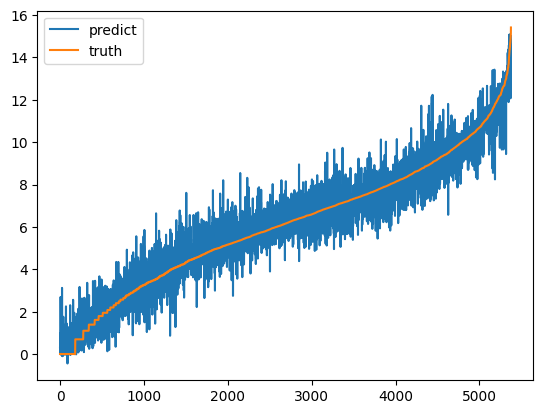

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Create the model
xgbr = xgb.XGBRegressor()

parameters = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
}

grid_search = GridSearchCV(estimator=xgbr, param_grid=parameters, scoring='r2', cv=3, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Fit model with best parameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('XGBoost MSE:', mse)
print('XGBoost RMSE:', rmse)
print('XGBoost R2:', r2)

df_comp = pd.DataFrame(zip(y_pred, y_test), columns=['predict', 'truth'])
print(df_comp.describe())
df_comp.sort_values('truth', axis=0, inplace=True)
plt.plot([i for i in range(df_comp.shape[0])], df_comp.predict)
plt.plot([i for i in range(df_comp.shape[0])], df_comp.truth)
plt.legend(['predict', 'truth'])
plt.show()

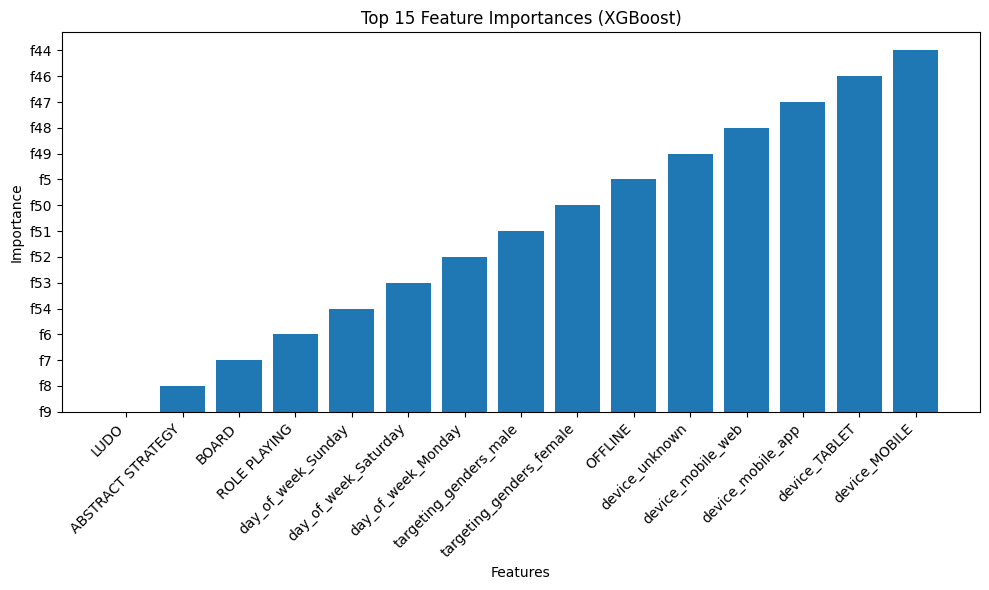

In [ ]:
importances = best_model.get_booster().get_score(importance_type='weight')
feature_importances = [(feature, score) for feature, score in zip(X.columns, importances)]
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Slice for top 15 features
top_features = feature_importances[:15]
features, scores = zip(*top_features)

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(features, scores)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.title('Top 15 Feature Importances (XGBoost)')
plt.tight_layout()
plt.show()


In [ ]:
top_features

[('LUDO', 'f9'),
 ('ABSTRACT STRATEGY', 'f8'),
 ('BOARD', 'f7'),
 ('ROLE PLAYING', 'f6'),
 ('day_of_week_Sunday', 'f54'),
 ('day_of_week_Saturday', 'f53'),
 ('day_of_week_Monday', 'f52'),
 ('targeting_genders_male', 'f51'),
 ('targeting_genders_female', 'f50'),
 ('OFFLINE', 'f5'),
 ('device_unknown', 'f49'),
 ('device_mobile_web', 'f48'),
 ('device_mobile_app', 'f47'),
 ('device_TABLET', 'f46'),
 ('device_MOBILE', 'f44')]

## Ensemble of RF and XGBoost

In [ ]:
from sklearn.ensemble import RandomForestRegressor, StackingRegressor

# Ensemble (Stacking) with XGBoost as final estimator
estimators = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('xgb', xgb.XGBRegressor(n_estimators=100, learning_rate=0.1))
]
ensemble = StackingRegressor(estimators=estimators, final_estimator=xgb.XGBRegressor())

ensemble.fit(X_train, y_train)
ensemble_pred = ensemble.predict(X_test)

ensemble_mse = mean_squared_error(y_test, ensemble_pred)
ensemble_rmse = np.sqrt(ensemble_mse)
ensemble_r2 = r2_score(y_test, ensemble_pred)

print('Ensemble MSE:', ensemble_mse)
print('Ensemble RMSE:', ensemble_rmse)
print('Ensemble R2:', ensemble_r2)

Ensemble MSE: 0.5757450738310756
Ensemble RMSE: 0.7587786724935511
Ensemble R2: 0.9383744618973107


In [ ]:
# Inverse log transformation to calculate true RMSE and R^2
y_test_exp = np.exp(y_test)  # Inverse log transformation on the actual values
y_pred_exp = np.exp(ensemble_pred)  # Inverse log transformation on the predicted values

# Calculate true MSE, RMSE, and R2
true_mse = mean_squared_error(y_test_exp, y_pred_exp)
true_rmse = np.sqrt(true_mse)
true_r2 = r2_score(y_test_exp, y_pred_exp)

print('True Ensemble MSE:', true_mse)
print('True Ensemble RMSE:', true_rmse)
print('True Ensemble R2:', true_r2)

True Ensemble MSE: 8957284612.122149
True Ensemble RMSE: 94642.93218261018
True Ensemble R2: 0.7019390319936156


# Clicks Through Rate (CTR)

In [ ]:
df['click_impression_rate'] = df.clicks/df.impressions
df.drop(df[df.click_impression_rate > 1].index, inplace=True)
df.click_impression_rate.value_counts()

click_impression_rate
0.000000    5164
0.066667      76
0.076923      74
0.166667      73
0.090909      72
            ... 
0.065272       1
0.057732       1
0.004288       1
0.019294       1
0.021585       1
Name: count, Length: 14066, dtype: int64

In [ ]:
# Handle cases where impressions are zero
df['click_impression_rate'] = df['click_impression_rate'].fillna(0)  # Replace NaN values with 0 if any

In [ ]:
# Function to handle log transformation with non-zero values
import numpy as np
def log_transform(x):
    return np.log(x[x > 0])

In [ ]:
df_sampled = df

In [ ]:
X = df_sampled.drop(['clicks','installs','purchase','purchase_value','impressions','click_impression_rate'],
            axis=1)
# y = df[['clicks','installs','purchase','purchase_value','impressions']]
y = df_sampled['click_impression_rate']

In [ ]:
df_sampled.shape

(26878, 60)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Choose your scaler
scaler = StandardScaler()

# Fit the scaler to your data
scaler.fit(X_train)

# Transform training and test sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

model = LinearRegression()

# Fit the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Linear Regression MSE:', mse)
print('Linear Regression RMSE:', rmse)
print('Linear Regression R2:', r2)


Linear Regression MSE: 0.0034440505629425174
Linear Regression RMSE: 0.05868603379802146
Linear Regression R2: 0.14502743919866012


In [ ]:
# Inverse log transformation to calculate true RMSE and R^2
y_test_exp = np.exp(y_test)  # Inverse log transformation on the actual values
y_pred_exp = np.exp(y_pred)  # Inverse log transformation on the predicted values

# Calculate true MSE, RMSE, and R2
true_mse = mean_squared_error(y_test_exp, y_pred_exp)
true_rmse = np.sqrt(true_mse)
true_r2 = r2_score(y_test_exp, y_pred_exp)

print('True LR MSE:', true_mse)
print('True LR RMSE:', true_rmse)
print('True LR R2:', true_r2)

True LR MSE: 0.007985923740947977
True LR RMSE: 0.0893639957754127
True LR R2: 0.08287342275827214


## SVR

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Create the model (adjust parameters as needed)
svr_model = SVR(kernel='rbf', C=1.0)

# Fit the model on the training set
svr_model.fit(X_train, y_train)

# Make predictions on the test set
svr_pred = svr_model.predict(X_test)

# Evaluate performance
svr_mse = mean_squared_error(y_test, svr_pred)
svr_rmse = np.sqrt(svr_mse)
svr_r2 = r2_score(y_test, svr_pred)

print('SVR MSE:', svr_mse)
print('SVR RMSE:', svr_rmse)
print('SVR R2:', svr_r2)

SVR MSE: 0.007476693724029869
SVR RMSE: 0.08646787683313306
SVR R2: -0.8560610138370419


In [ ]:
# Inverse log transformation to calculate true RMSE and R^2
y_test_exp = np.exp(y_test)  # Inverse log transformation on the actual values
y_pred_exp = np.exp(svr_pred)  # Inverse log transformation on the predicted values

# Calculate true MSE, RMSE, and R2
true_mse = mean_squared_error(y_test_exp, y_pred_exp)
true_rmse = np.sqrt(true_mse)
true_r2 = r2_score(y_test_exp, y_pred_exp)

print('True SVR MSE:', true_mse)
print('True SVR RMSE:', true_rmse)
print('True SVR R2:', true_r2)

True SVR MSE: 0.012209244541455302
True SVR RMSE: 0.1104954503201616
True SVR R2: -0.4021449515723712


## Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create the model (adjust parameters as needed)
dt_model = DecisionTreeRegressor(max_depth=6, random_state=42)

# Fit the model on the training set
dt_model.fit(X_train, y_train)

# Make predictions on the test set
dt_pred = dt_model.predict(X_test)

# Evaluate performance
dt_mse = mean_squared_error(y_test, dt_pred)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, dt_pred)

print('Decision Tree MSE:', dt_mse)
print('Decision Tree RMSE:', dt_rmse)
print('Decision Tree R2:', dt_r2)


Decision Tree MSE: 0.0031649168499939006
Decision Tree RMSE: 0.056257593709595335
Decision Tree R2: 0.21432133050604174


In [ ]:
# Inverse log transformation to calculate true RMSE and R^2
y_test_exp = np.exp(y_test)  # Inverse log transformation on the actual values
y_pred_exp = np.exp(dt_pred)  # Inverse log transformation on the predicted values

# Calculate true MSE, RMSE, and R2
true_mse = mean_squared_error(y_test_exp, y_pred_exp)
true_rmse = np.sqrt(true_mse)
true_r2 = r2_score(y_test_exp, y_pred_exp)

print('True DT MSE:', true_mse)
print('True DT RMSE:', true_rmse)
print('True DT R2:', true_r2)

True DT MSE: 0.007475136228368065
True DT RMSE: 0.08645887015435759
True DT R2: 0.14153373787100088


## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create the model (adjust parameters as needed)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training set
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_pred = rf_model.predict(X_test)

# Evaluate performance
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_pred)

print('Random Forest MSE:', rf_mse)
print('Random Forest RMSE:', rf_rmse)
print('Random Forest R2:', rf_r2)

Random Forest MSE: 0.003565149388884788
Random Forest RMSE: 0.059708871944500745
Random Forest R2: 0.11496511246050667


In [ ]:
# Inverse log transformation to calculate true RMSE and R^2
y_test_exp = np.exp(y_test)  # Inverse log transformation on the actual values
y_pred_exp = np.exp(rf_pred)  # Inverse log transformation on the predicted values

# Calculate true MSE, RMSE, and R2
true_mse = mean_squared_error(y_test_exp, y_pred_exp)
true_rmse = np.sqrt(true_mse)
true_r2 = r2_score(y_test_exp, y_pred_exp)

print('True RF MSE:', true_mse)
print('True RF RMSE:', true_rmse)
print('True RF R2:', true_r2)

True RF MSE: 0.008112408266319395
True RF RMSE: 0.09006890843304029
True RF R2: 0.06834757407865988


## XGBoost

In [ ]:
import xgboost as xgb

# Create the model (adjust parameters as needed)
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1)

# Fit the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate performance (same metrics as before)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('XGBoost MSE:', mse)
print('XGBoost RMSE:', rmse)
print('XGBoost R2:', r2)


XGBoost MSE: 0.0033402454269978255
XGBoost RMSE: 0.057794856406066325
XGBoost R2: 0.17079667262917575


           predict        truth
count  5376.000000  5376.000000
mean      0.032764     0.032785
std       0.032944     0.063474
min      -0.015779     0.000000
25%       0.011780     0.003731
50%       0.023302     0.019656
75%       0.044693     0.040731
max       0.698268     1.000000


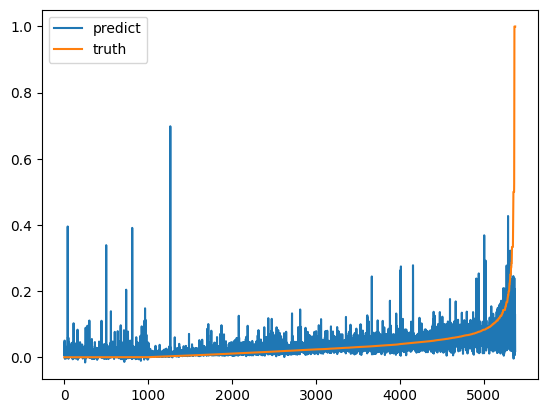

In [ ]:
df_comp = pd.DataFrame(zip(y_pred, y_test), columns=['predict', 'truth'])
print(df_comp.describe())
df_comp.sort_values('truth', axis=0, inplace=True)
plt.plot([i for i in range(df_comp.shape[0])], df_comp.predict)
plt.plot([i for i in range(df_comp.shape[0])], df_comp.truth)
plt.legend(['predict', 'truth'])
plt.show()

In [ ]:
# Inverse log transformation to calculate true RMSE and R^2
y_test_exp = np.exp(y_test)  # Inverse log transformation on the actual values
y_pred_exp = np.exp(y_pred)  # Inverse log transformation on the predicted values

# Calculate true MSE, RMSE, and R2
true_mse = mean_squared_error(y_test_exp, y_pred_exp)
true_rmse = np.sqrt(true_mse)
true_r2 = r2_score(y_test_exp, y_pred_exp)

print('True Ensemble MSE:', true_mse)
print('True Ensemble RMSE:', true_rmse)
print('True Ensemble R2:', true_r2)

True Ensemble MSE: 0.007858587623410587
True Ensemble RMSE: 0.08864867524904468
True Ensemble R2: 0.09749707074498004


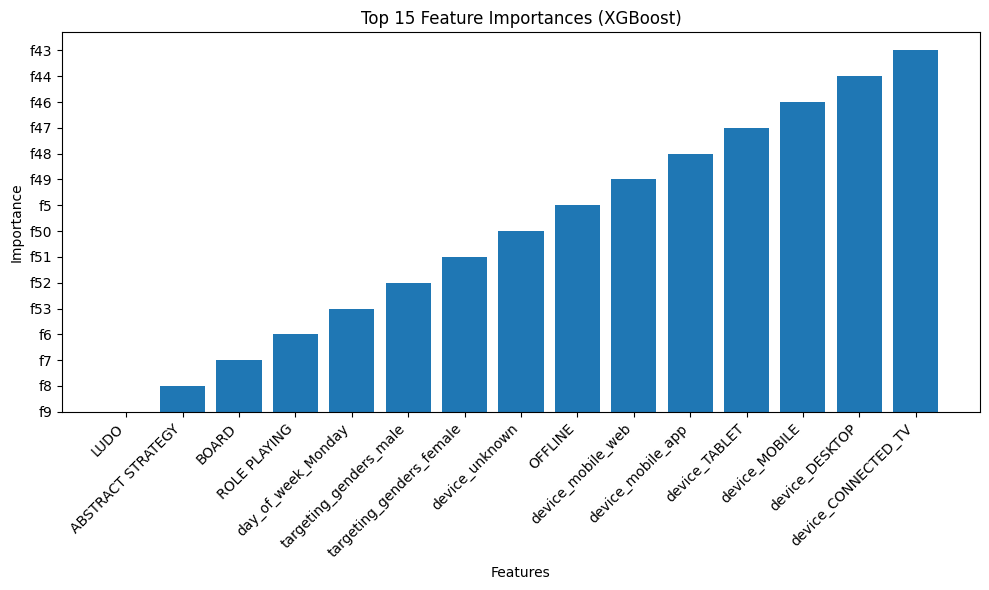

In [ ]:
importances = model.get_booster().get_score(importance_type='weight')
feature_importances = [(feature, score) for feature, score in zip(X.columns, importances)]
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Slice for top 15 features
top_features = feature_importances[:15]
features, scores = zip(*top_features)

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(features, scores)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.title('Top 15 Feature Importances (XGBoost)')
plt.tight_layout()
plt.show()


In [ ]:
top_features

[('LUDO', 'f9'),
 ('ABSTRACT STRATEGY', 'f8'),
 ('BOARD', 'f7'),
 ('ROLE PLAYING', 'f6'),
 ('day_of_week_Monday', 'f53'),
 ('targeting_genders_male', 'f52'),
 ('targeting_genders_female', 'f51'),
 ('device_unknown', 'f50'),
 ('OFFLINE', 'f5'),
 ('device_mobile_web', 'f49'),
 ('device_mobile_app', 'f48'),
 ('device_TABLET', 'f47'),
 ('device_MOBILE', 'f46'),
 ('device_DESKTOP', 'f44'),
 ('device_CONNECTED_TV', 'f43')]

### Tuning HyperParameters

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 200, 'subsample': 0.7}
Best score: 0.18390308028054084
XGBoost MSE: 0.00317421909319846
XGBoost RMSE: 0.05634020849445323
XGBoost R2: 0.21201208371989577
           predict        truth
count  5376.000000  5376.000000
mean      0.032635     0.032785
std       0.023563     0.063474
min       0.005447     0.000000
25%       0.015680     0.003731
50%       0.025511     0.019656
75%       0.043881     0.040731
max       0.312633     1.000000


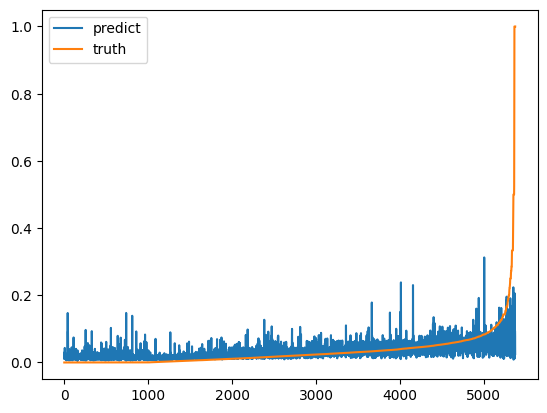

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Create the model
xgbr = xgb.XGBRegressor()

parameters = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
}

grid_search = GridSearchCV(estimator=xgbr, param_grid=parameters, scoring='r2', cv=3, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Fit model with best parameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('XGBoost MSE:', mse)
print('XGBoost RMSE:', rmse)
print('XGBoost R2:', r2)

df_comp = pd.DataFrame(zip(y_pred, y_test), columns=['predict', 'truth'])
print(df_comp.describe())
df_comp.sort_values('truth', axis=0, inplace=True)
plt.plot([i for i in range(df_comp.shape[0])], df_comp.predict)
plt.plot([i for i in range(df_comp.shape[0])], df_comp.truth)
plt.legend(['predict', 'truth'])
plt.show()

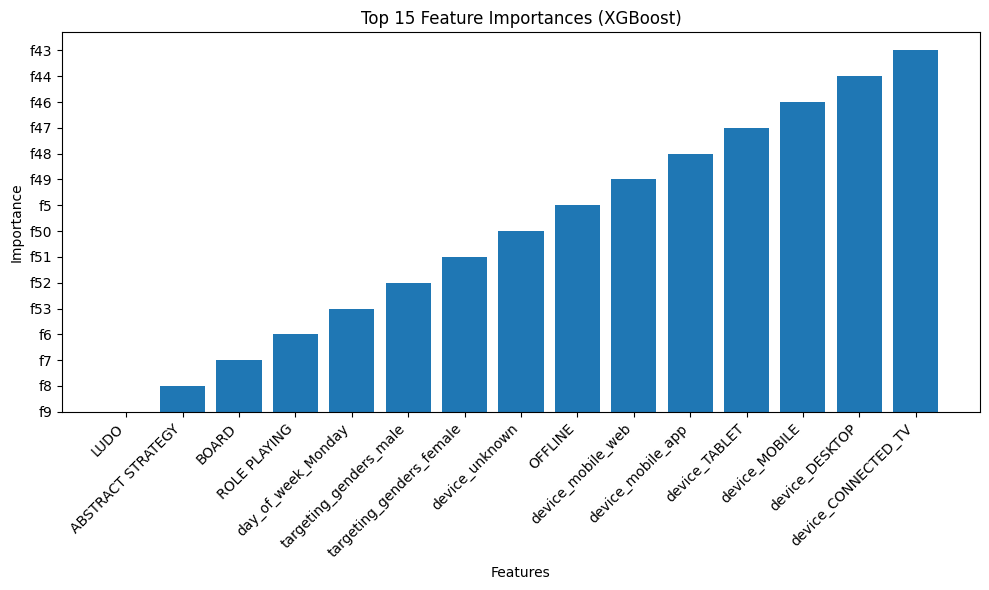

In [ ]:
importances = best_model.get_booster().get_score(importance_type='weight')
feature_importances = [(feature, score) for feature, score in zip(X.columns, importances)]
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Slice for top 15 features
top_features = feature_importances[:15]
features, scores = zip(*top_features)

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(features, scores)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.title('Top 15 Feature Importances (XGBoost)')
plt.tight_layout()
plt.show()


In [ ]:
top_features

[('LUDO', 'f9'),
 ('ABSTRACT STRATEGY', 'f8'),
 ('BOARD', 'f7'),
 ('ROLE PLAYING', 'f6'),
 ('day_of_week_Monday', 'f53'),
 ('targeting_genders_male', 'f52'),
 ('targeting_genders_female', 'f51'),
 ('device_unknown', 'f50'),
 ('OFFLINE', 'f5'),
 ('device_mobile_web', 'f49'),
 ('device_mobile_app', 'f48'),
 ('device_TABLET', 'f47'),
 ('device_MOBILE', 'f46'),
 ('device_DESKTOP', 'f44'),
 ('device_CONNECTED_TV', 'f43')]

## Ensemble of RF and XGBoost

In [ ]:
from sklearn.ensemble import RandomForestRegressor, StackingRegressor

# Ensemble (Stacking) with XGBoost as final estimator
estimators = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('xgb', xgb.XGBRegressor(n_estimators=100, learning_rate=0.1))
]
ensemble = StackingRegressor(estimators=estimators, final_estimator=xgb.XGBRegressor())

ensemble.fit(X_train, y_train)
ensemble_pred = ensemble.predict(X_test)

ensemble_mse = mean_squared_error(y_test, ensemble_pred)
ensemble_rmse = np.sqrt(ensemble_mse)
ensemble_r2 = r2_score(y_test, ensemble_pred)

print('Ensemble MSE:', ensemble_mse)
print('Ensemble RMSE:', ensemble_rmse)
print('Ensemble R2:', ensemble_r2)

Ensemble MSE: 0.0036582459552464116
Ensemble RMSE: 0.06048343537900614
Ensemble R2: 0.0918542410347386


In [ ]:
# Inverse log transformation to calculate true RMSE and R^2
y_test_exp = np.exp(y_test)  # Inverse log transformation on the actual values
y_pred_exp = np.exp(ensemble_pred)  # Inverse log transformation on the predicted values

# Calculate true MSE, RMSE, and R2
true_mse = mean_squared_error(y_test_exp, y_pred_exp)
true_rmse = np.sqrt(true_mse)
true_r2 = r2_score(y_test_exp, y_pred_exp)

print('True Ensemble MSE:', true_mse)
print('True Ensemble RMSE:', true_rmse)
print('True Ensemble R2:', true_r2)

True Ensemble MSE: 0.008294747437720476
True Ensemble RMSE: 0.09107550404867643
True Ensemble R2: 0.047407216320583534
